This code contains the evaluations for pommerman, a multi-agent environment for research in AI and reinforcement learning.

In [1]:
import os
import sys
sys.path.append(r'c:\Users\princ\source\repos\school\Research-Project\pommerman_research')
import evaluations.evaluate as evaluate

Loading data for: happo_pommerman
Loading data for: mappo_pommerman
Loading data for: ppo_pommerman
Loading data for: happo_ensemble_pommerman
Loading data for: mappo_ensemble_pommerman
Loading data for: ppo_ensemble_pommerman
Loading data for: happo_ensemble_pommerman_llm
Loading data for: mappo_ensemble_pommerman_llm
Loading data for: ppo_ensemble_pommerman_llm


  PERFORMING SINGLE-EXPERIMENT ANALYSIS  

--- Analysing: happo_pommerman ---


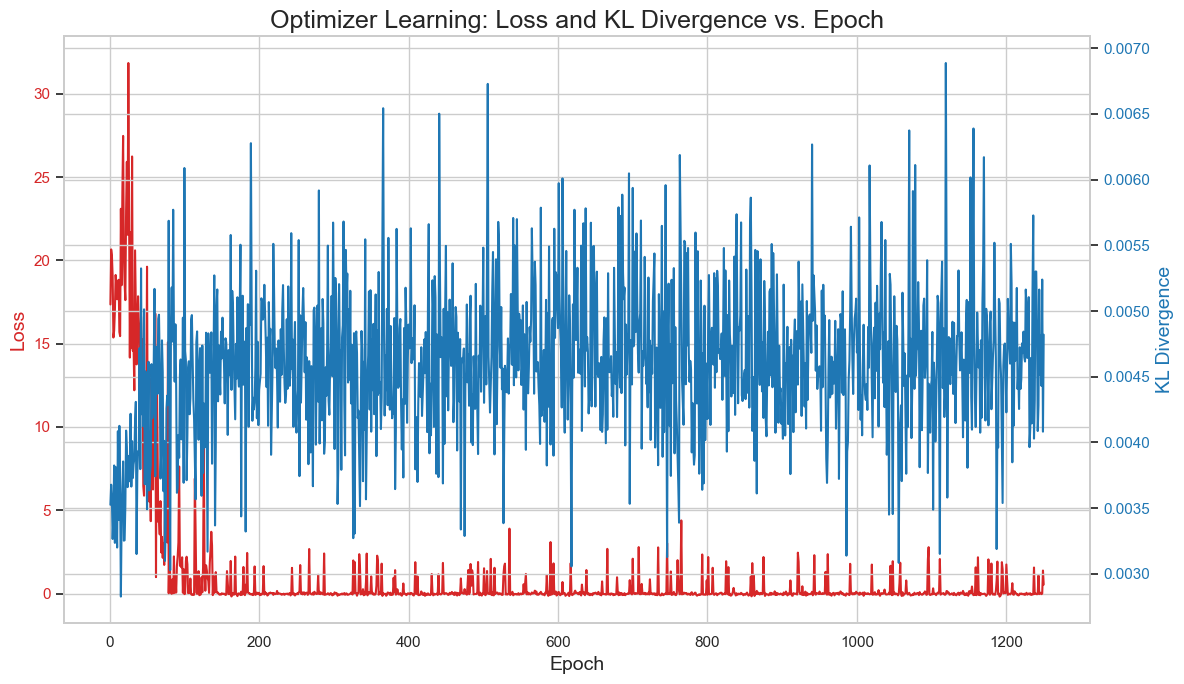

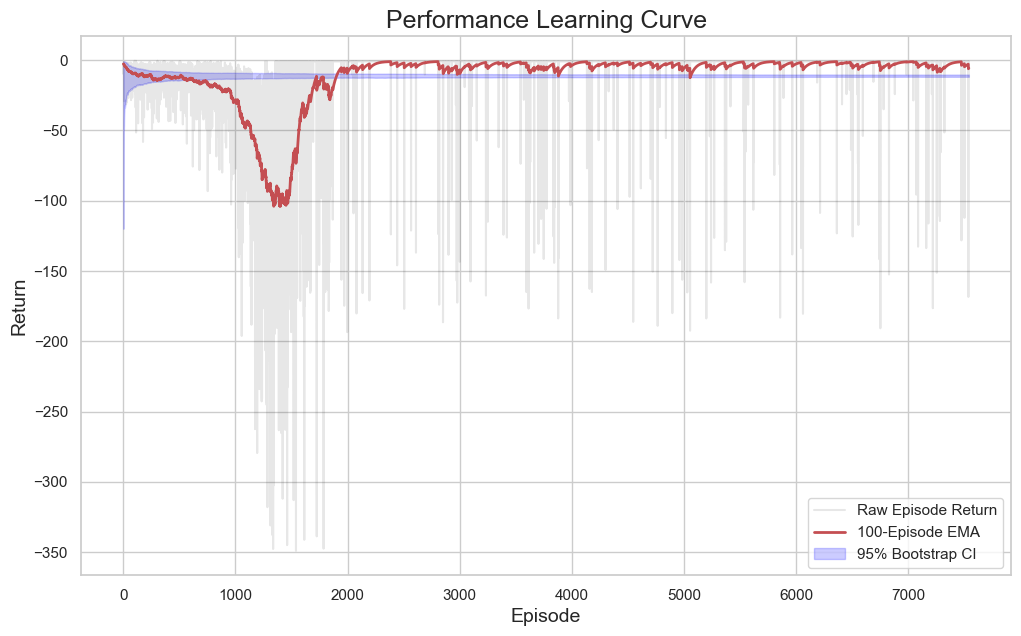

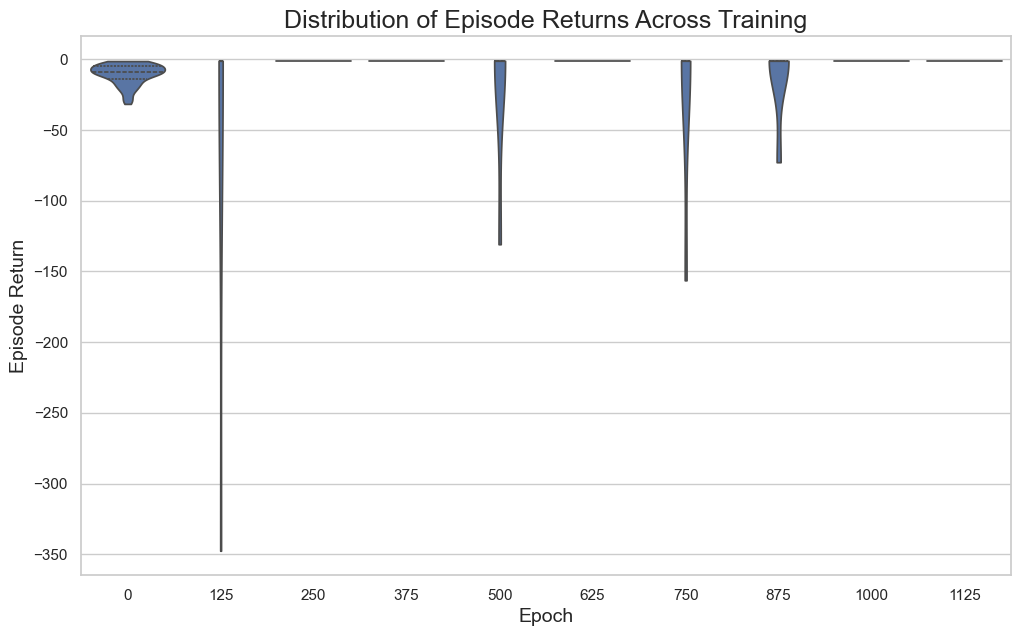

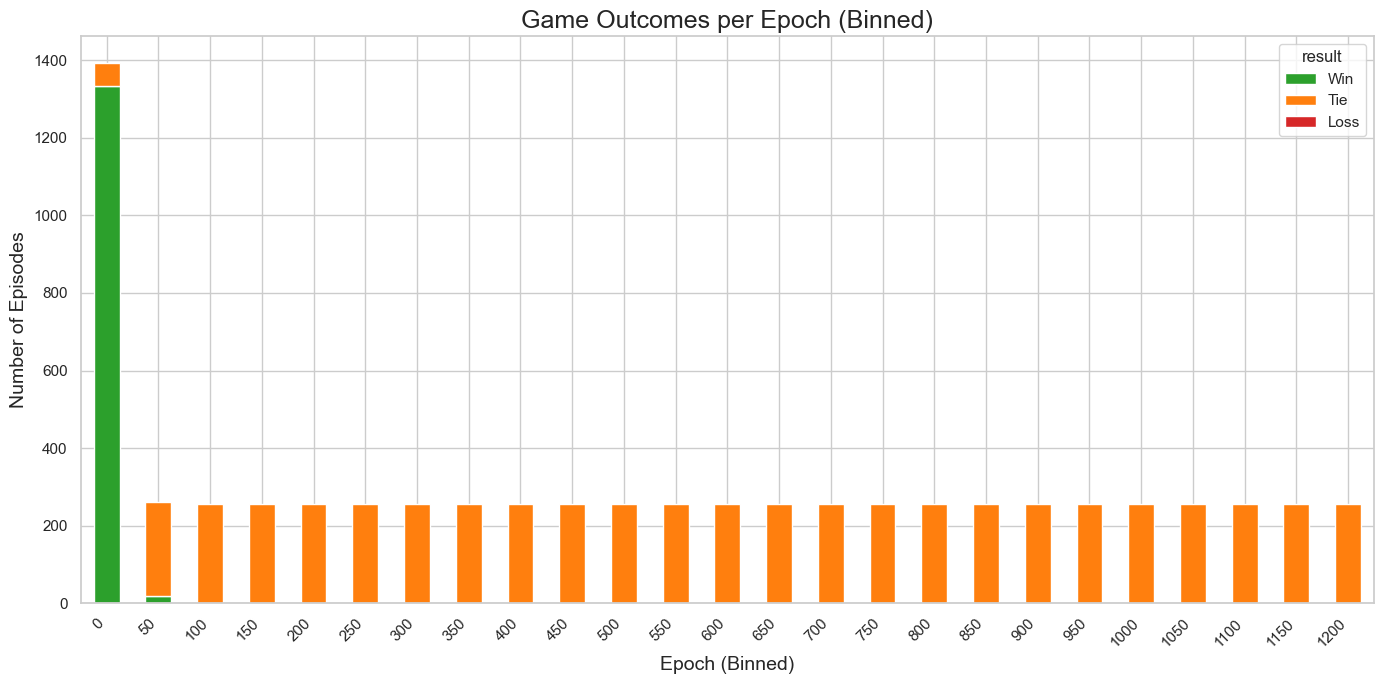

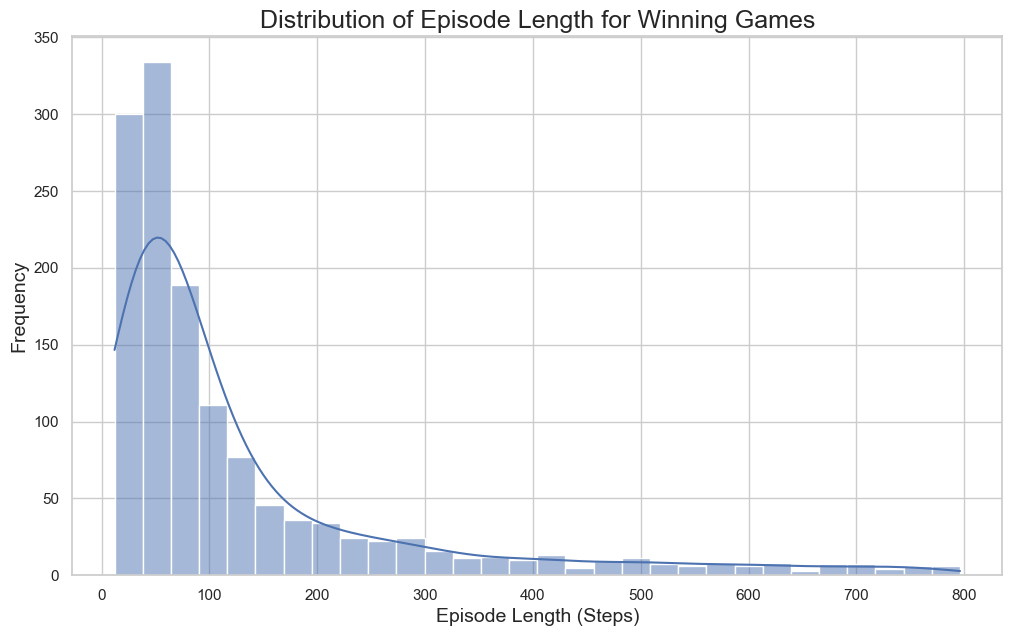


--- Analysing: mappo_pommerman ---


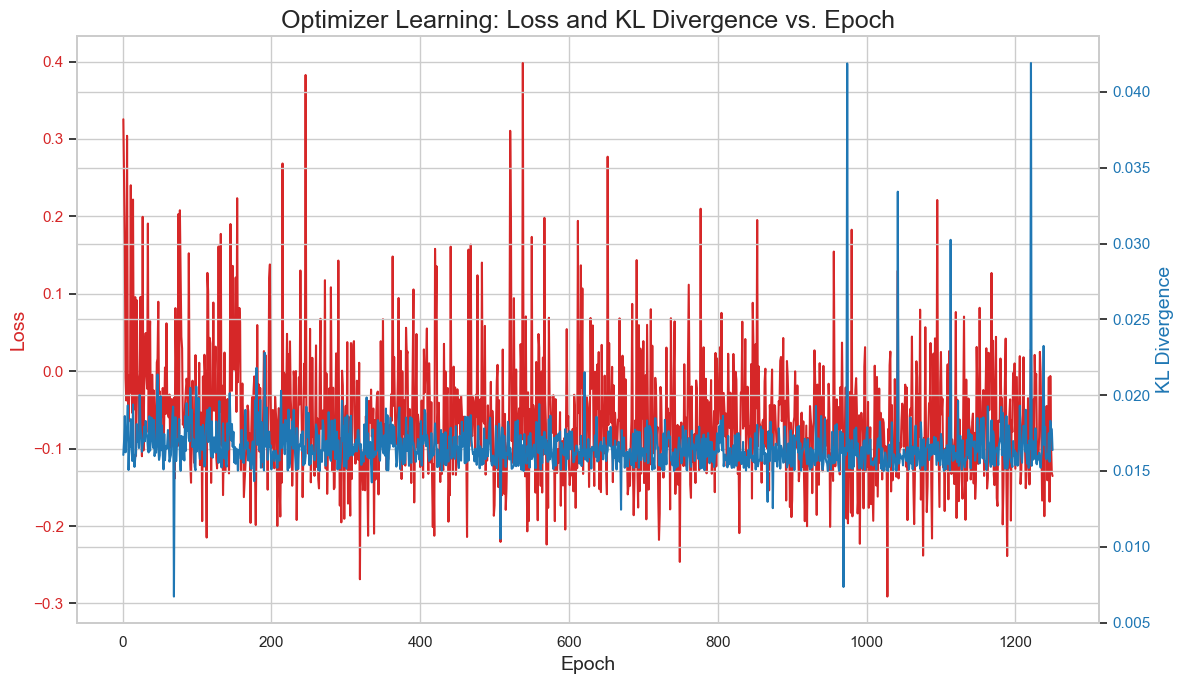

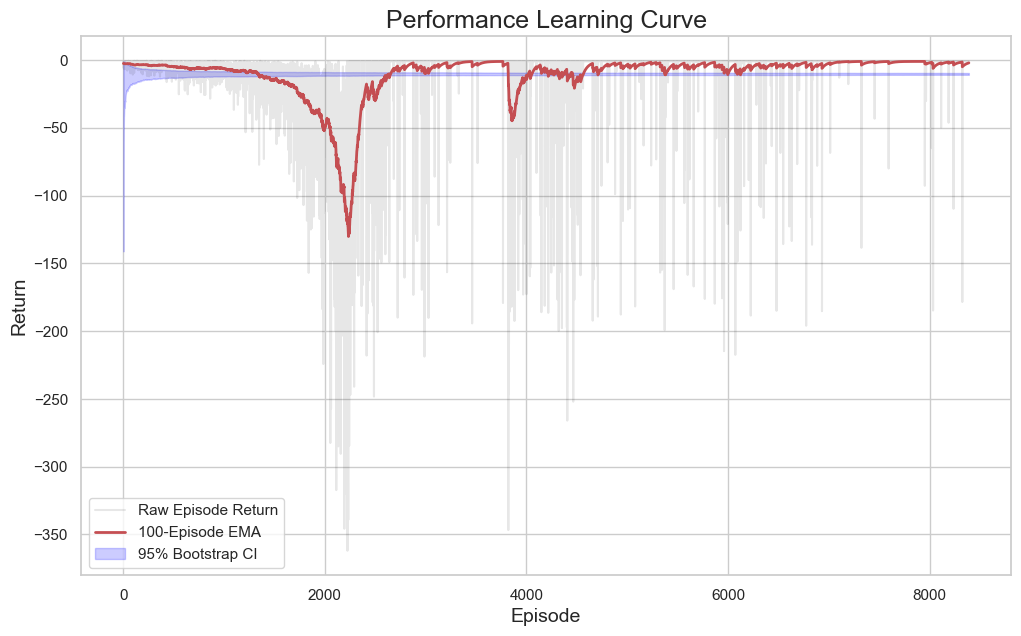

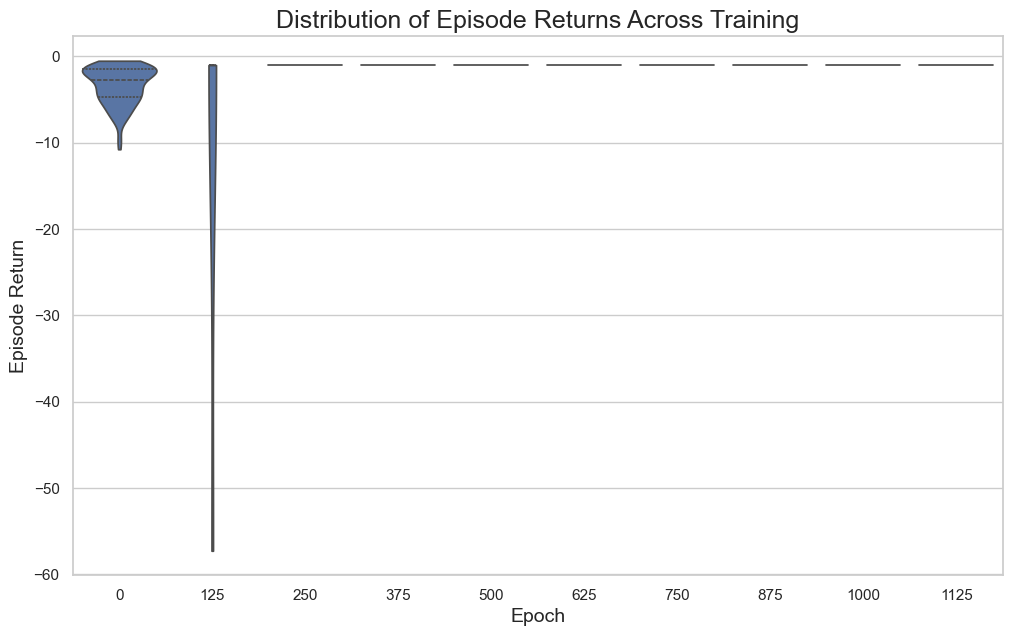

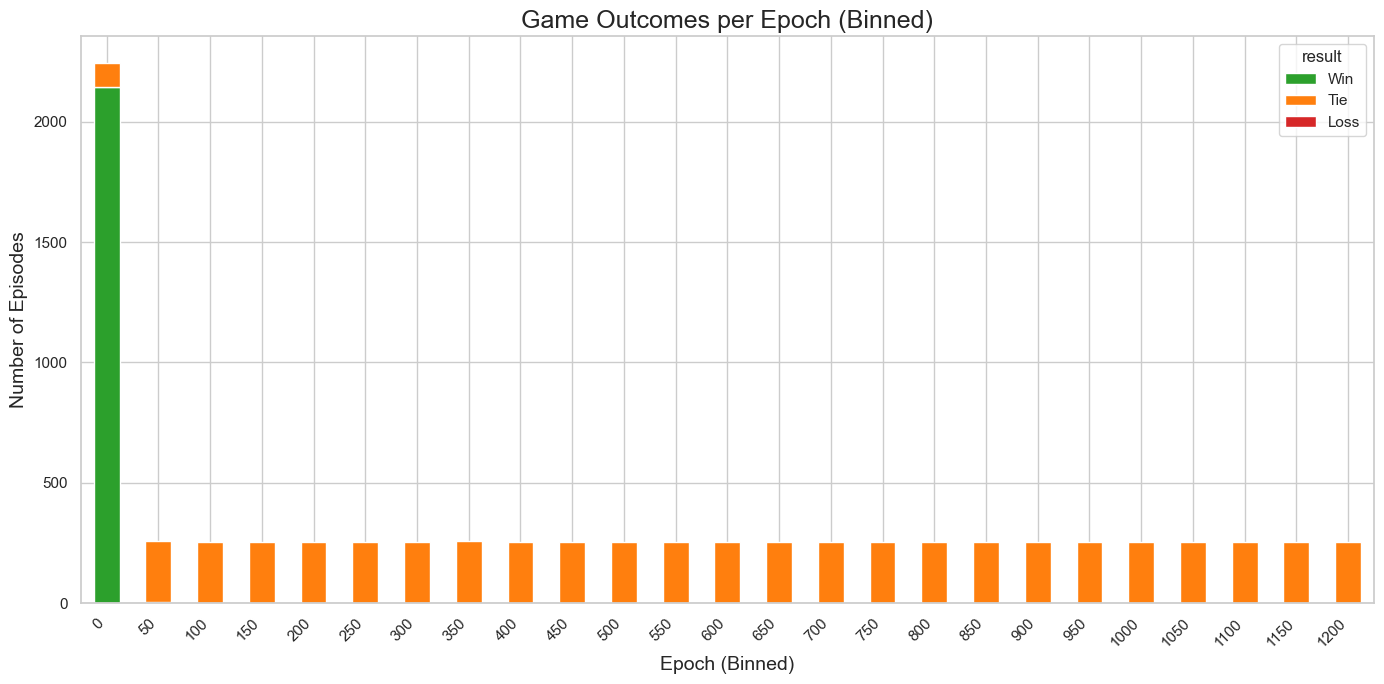


--- Analysing: ppo_pommerman ---


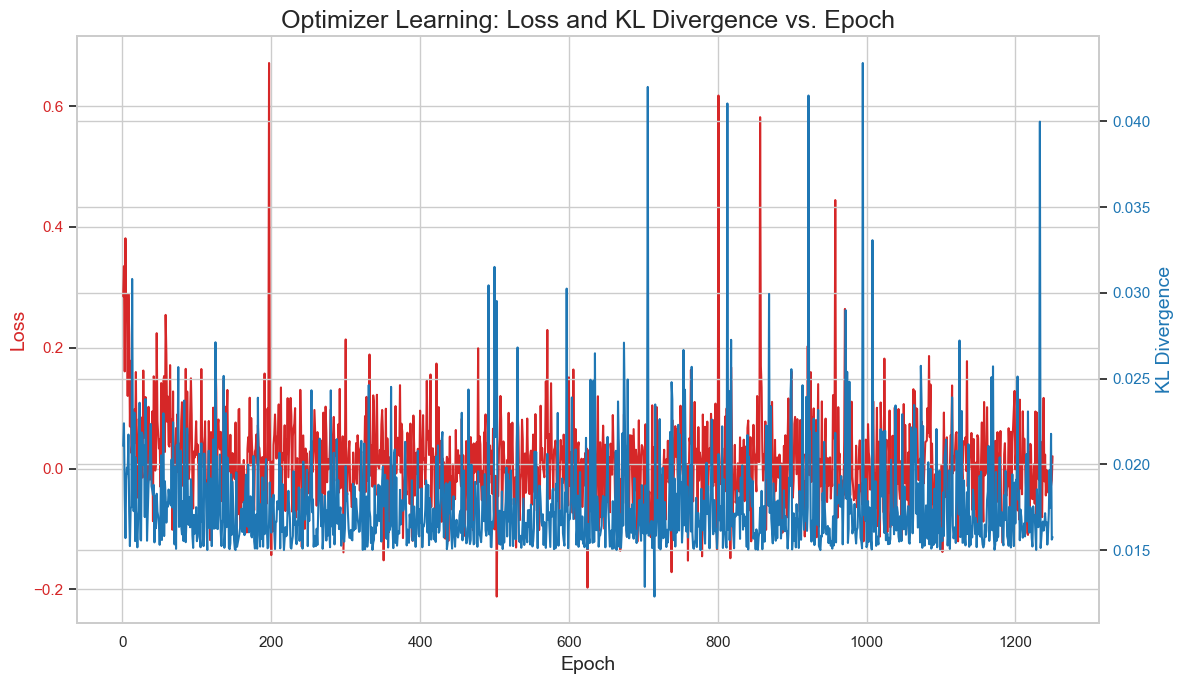

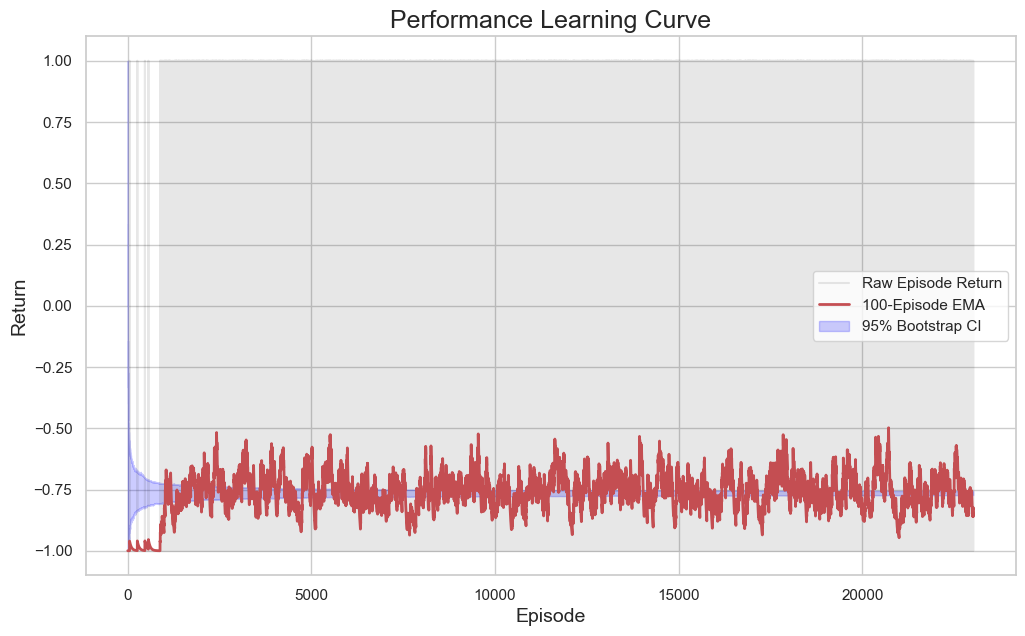

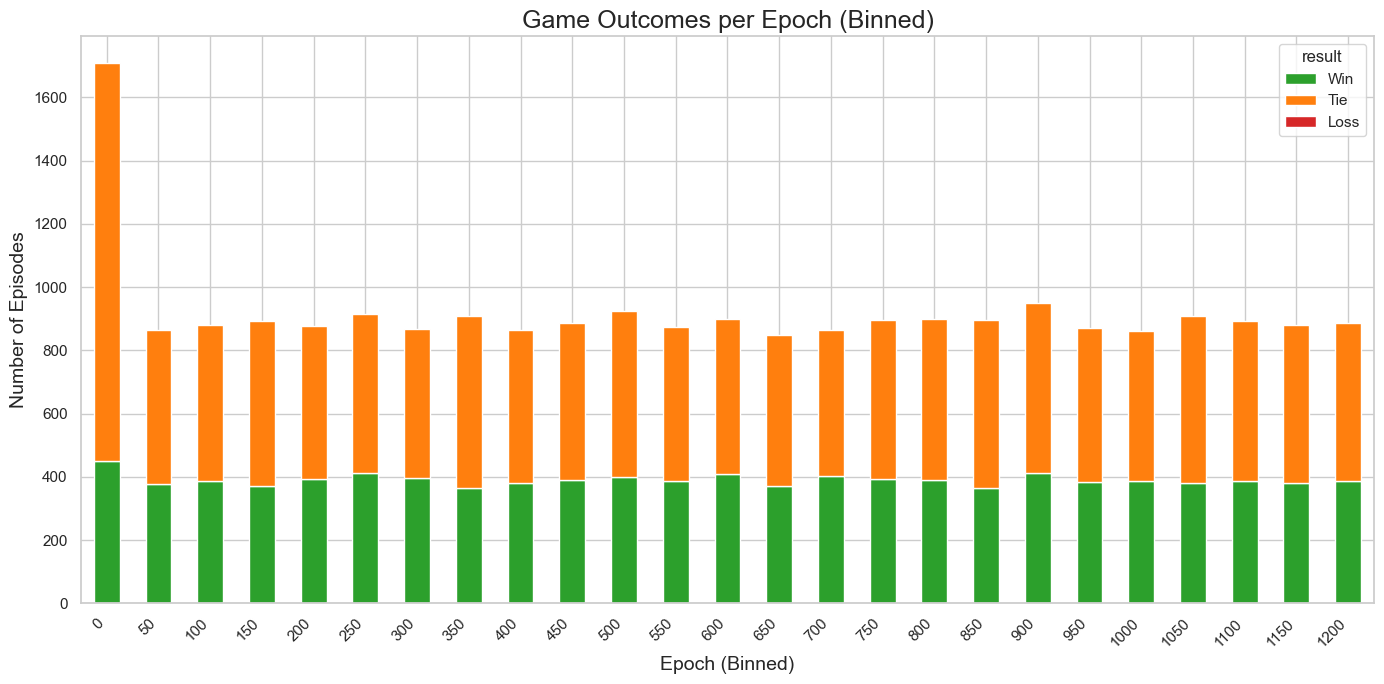

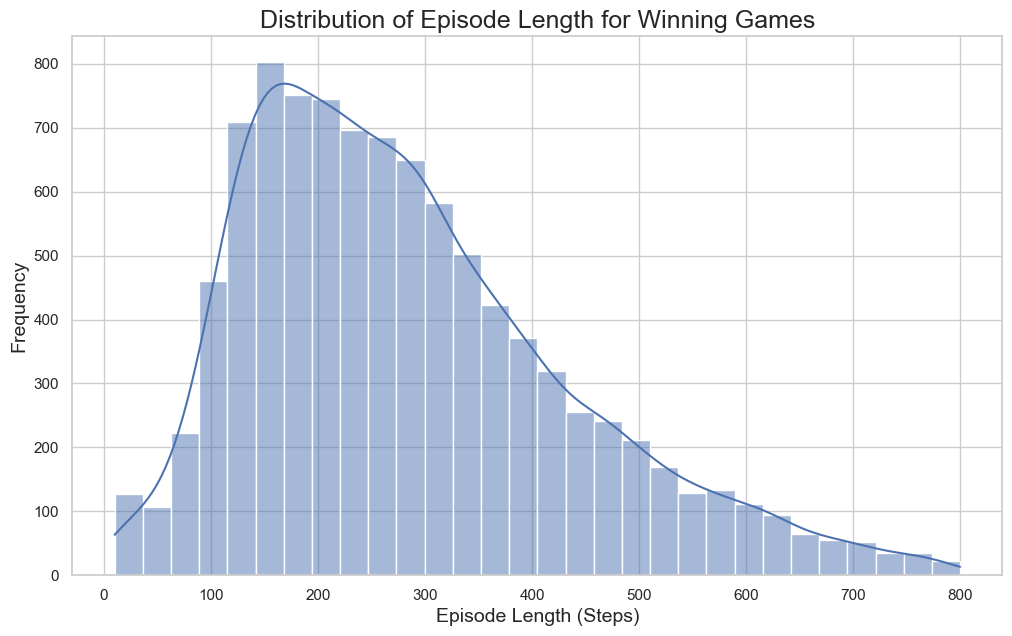


--- Analysing: happo_ensemble_pommerman ---


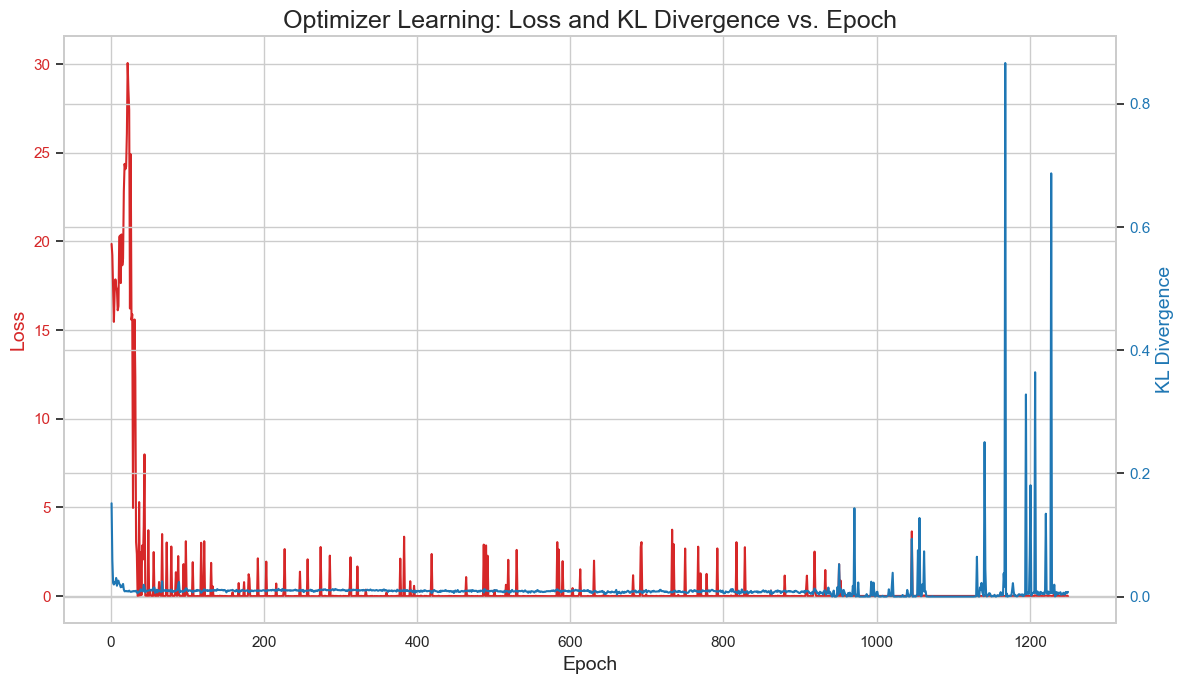

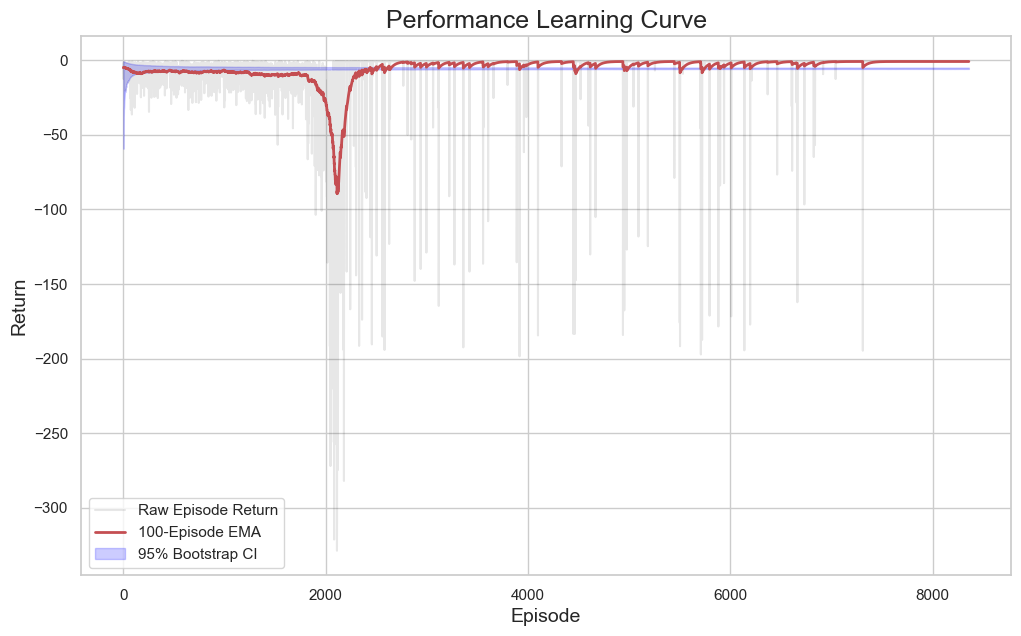

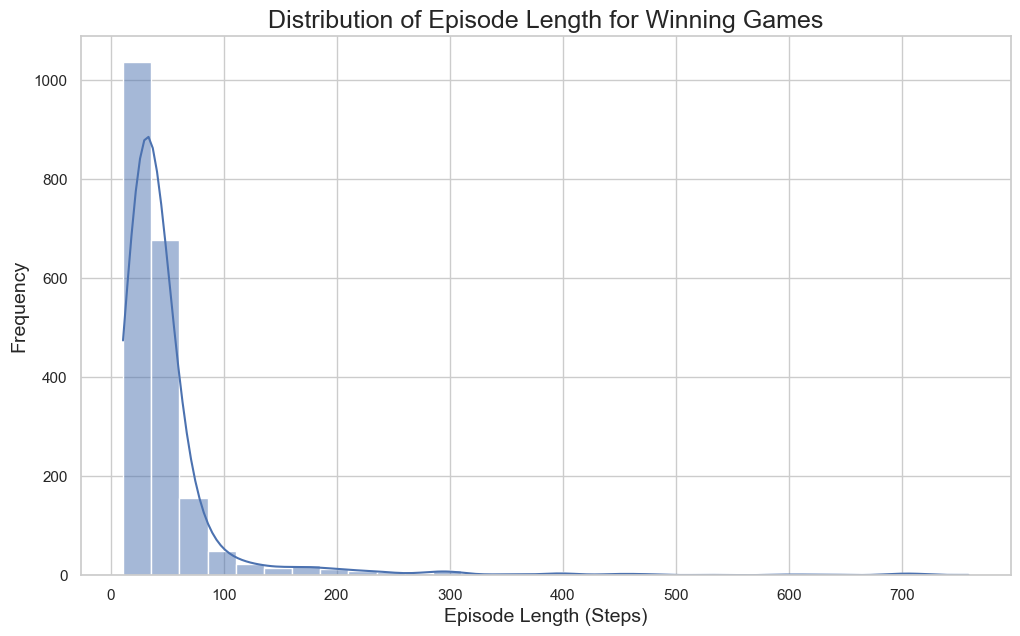


--- Analysing: mappo_ensemble_pommerman ---


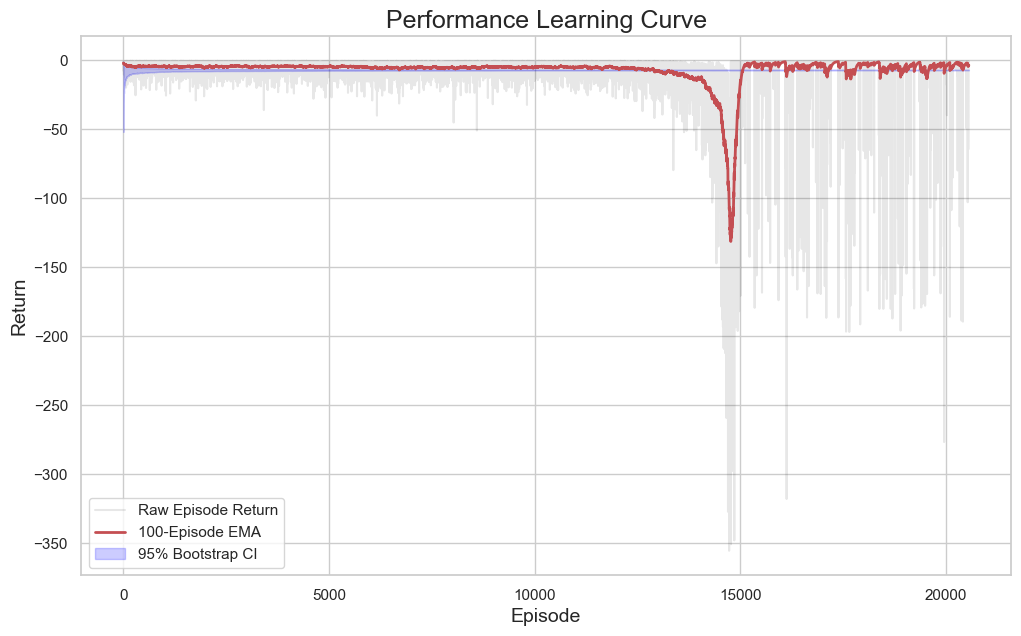

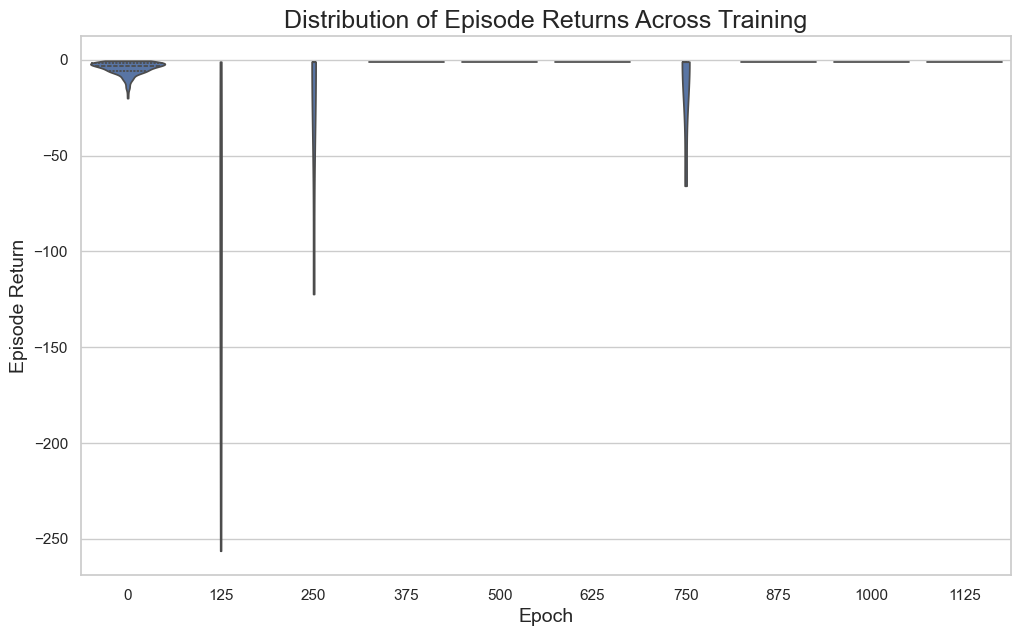

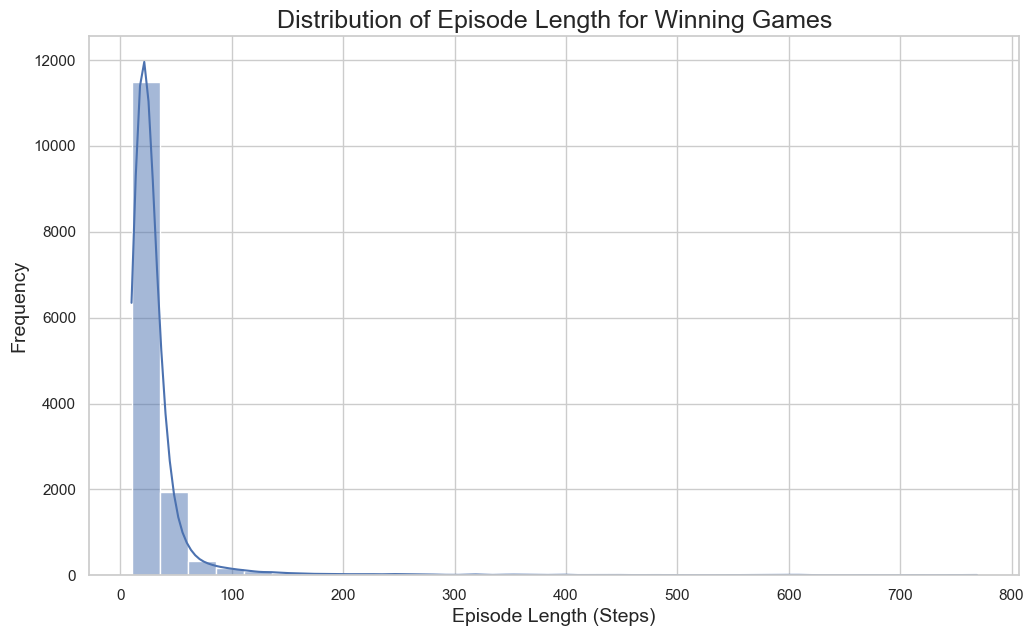


--- Analysing: ppo_ensemble_pommerman ---


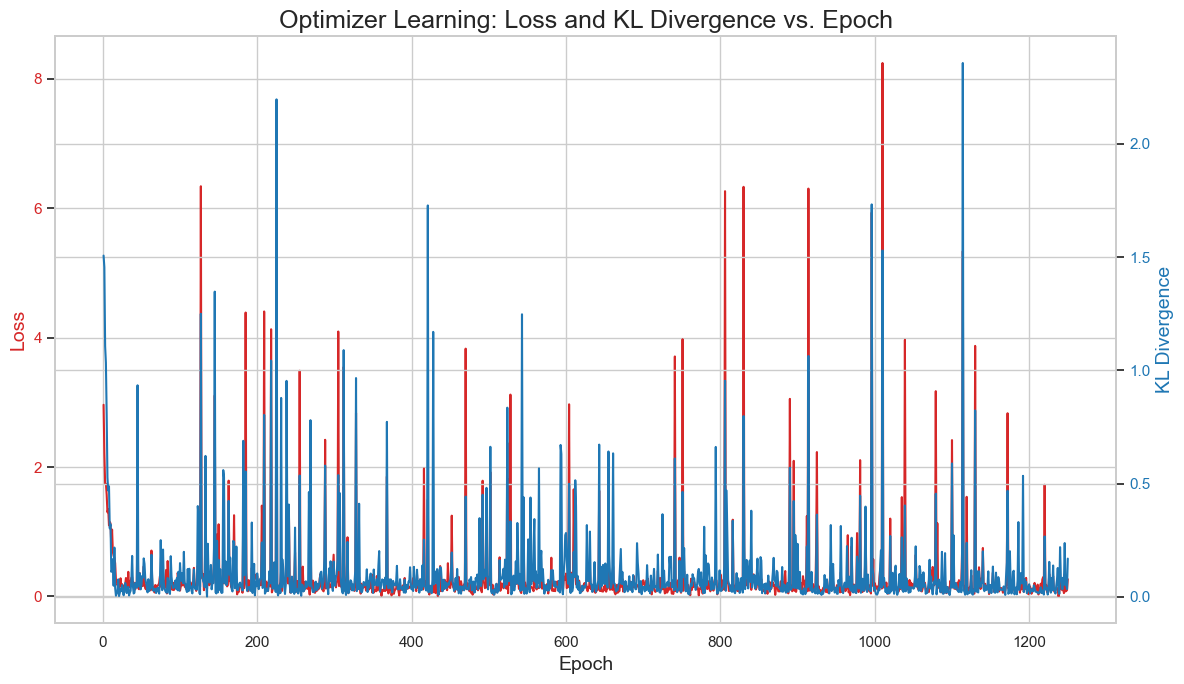

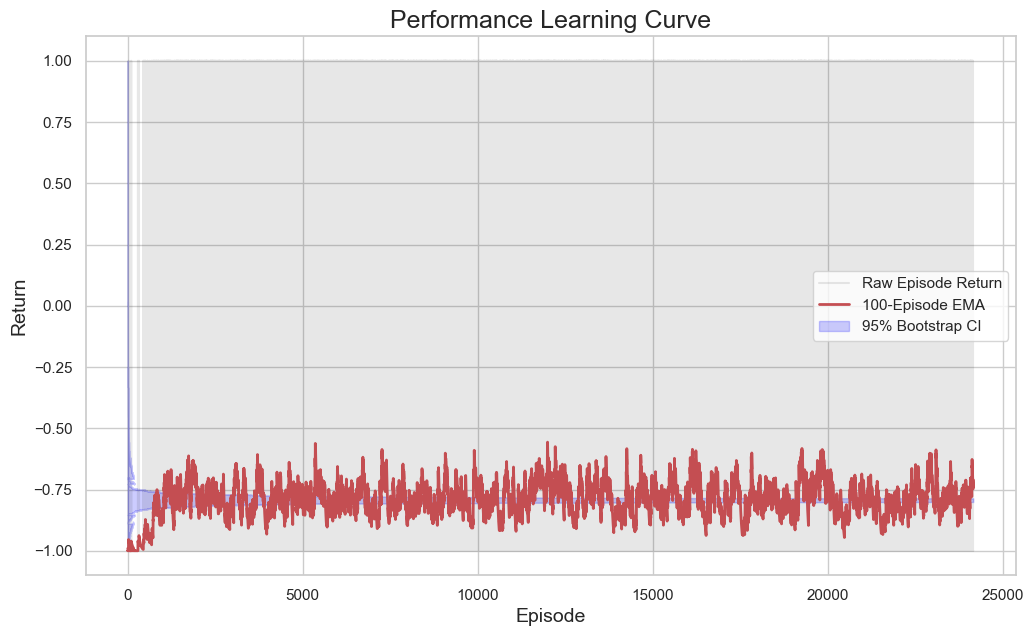

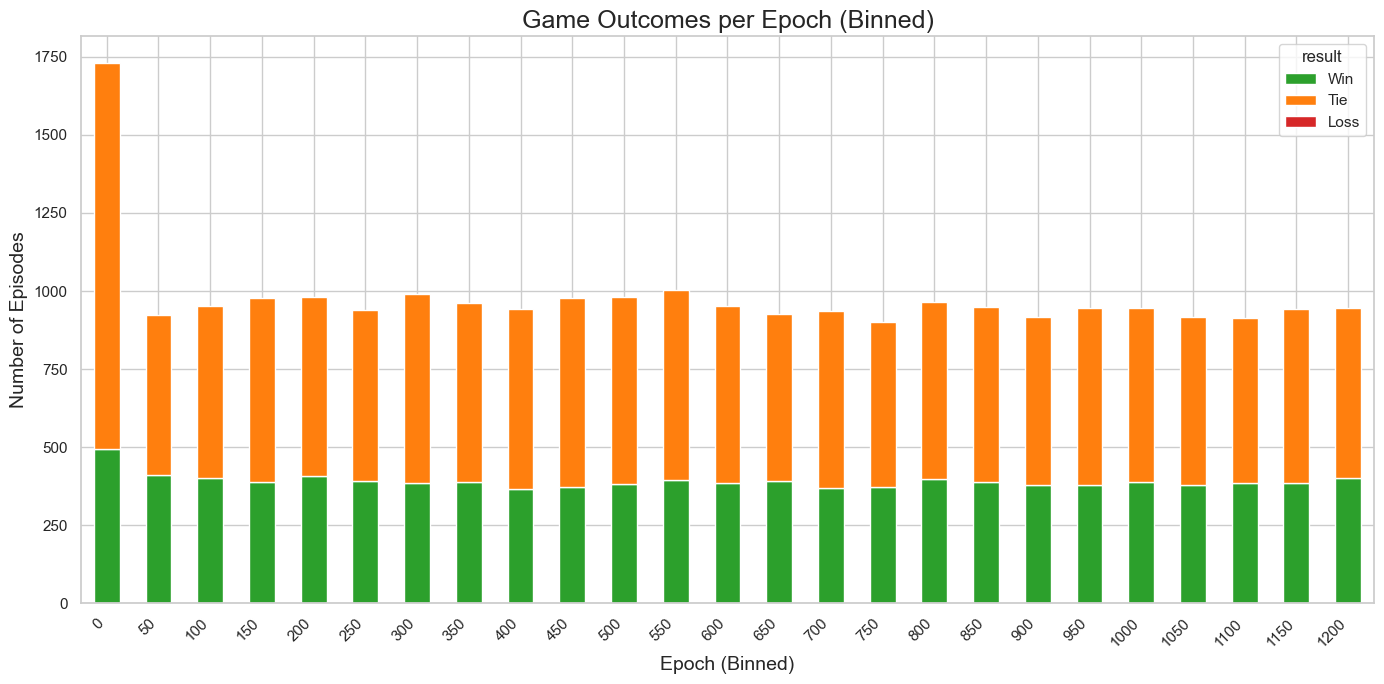


--- Analysing: happo_ensemble_pommerman_llm ---


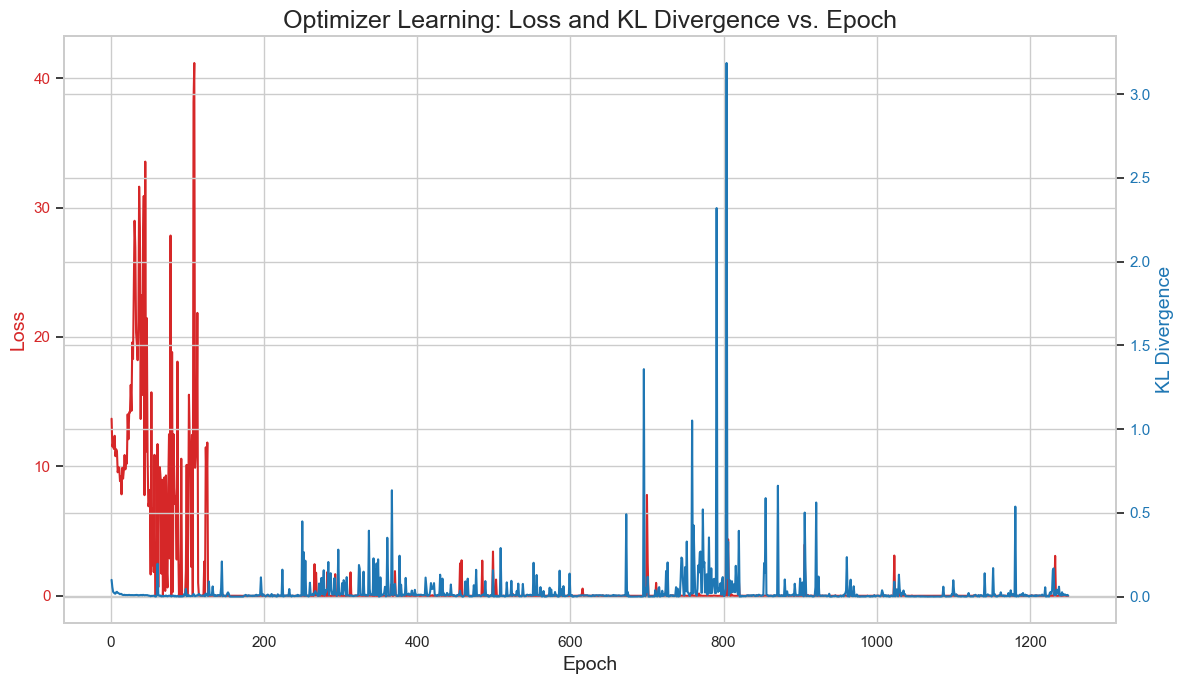

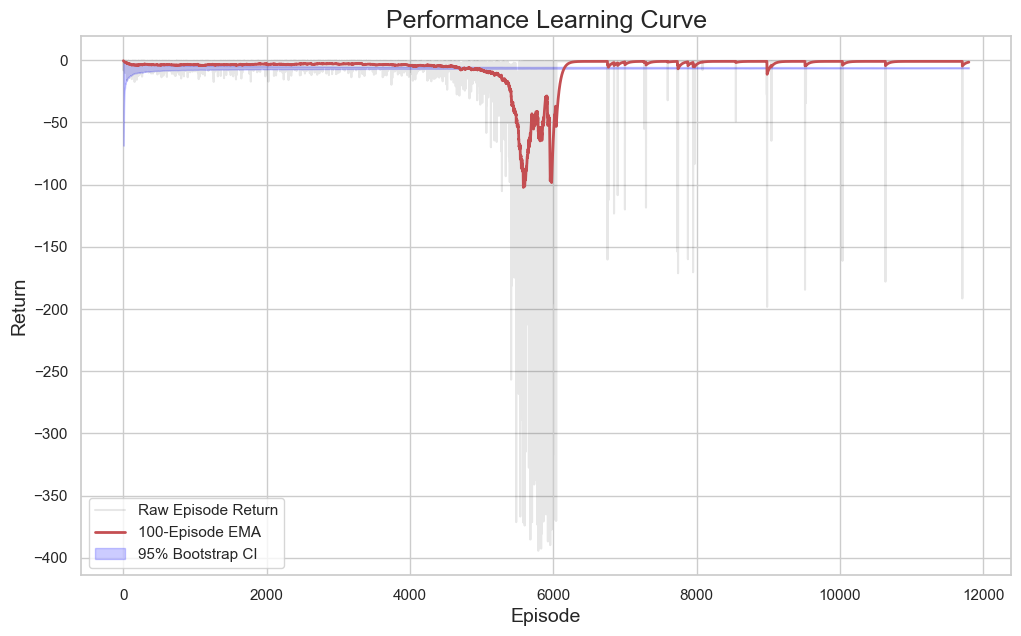

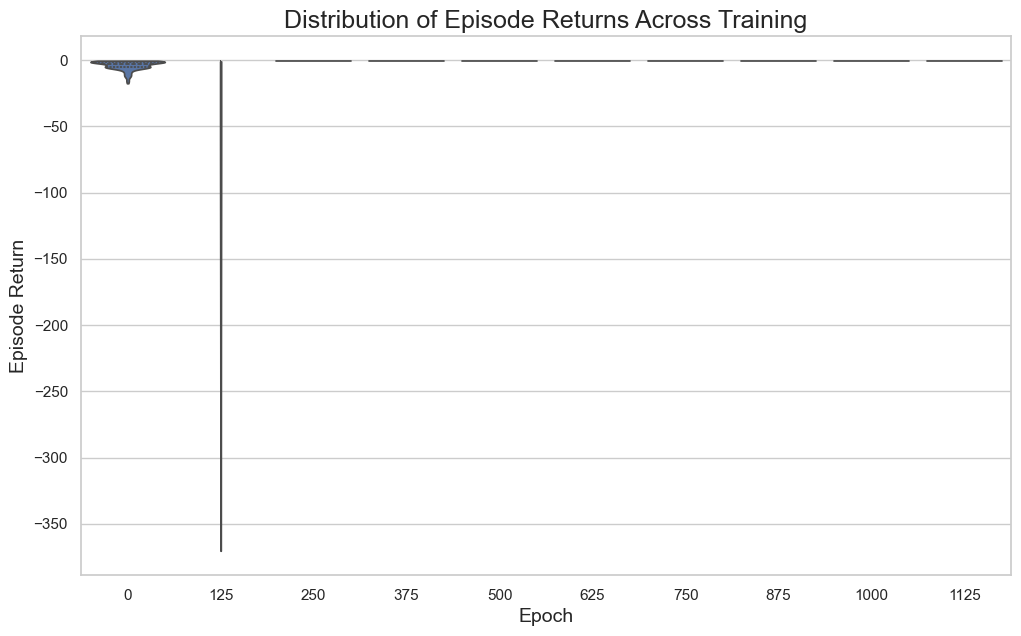

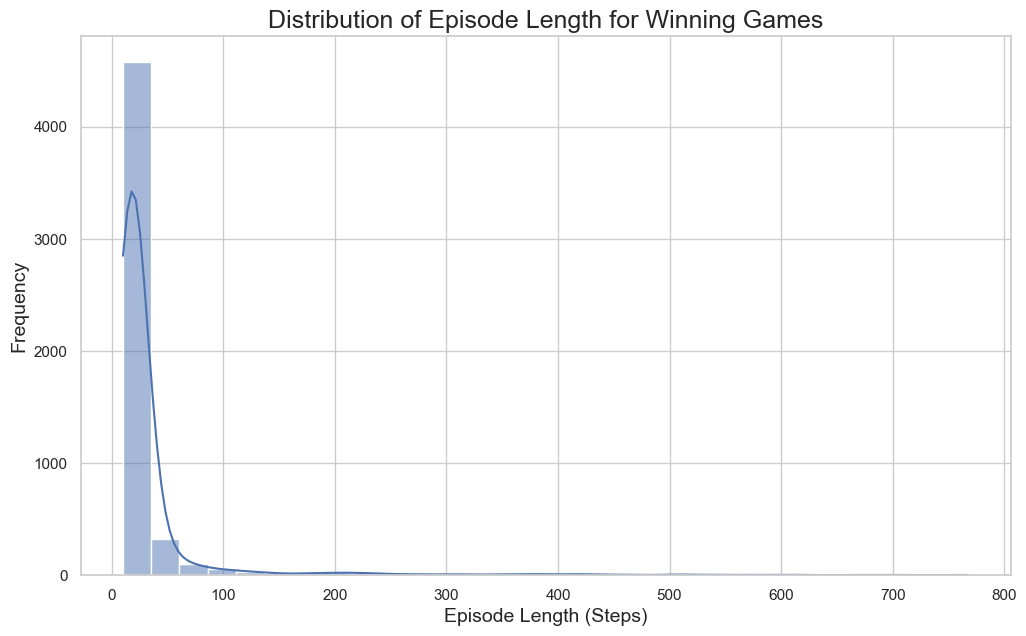


--- Analysing: mappo_ensemble_pommerman_llm ---


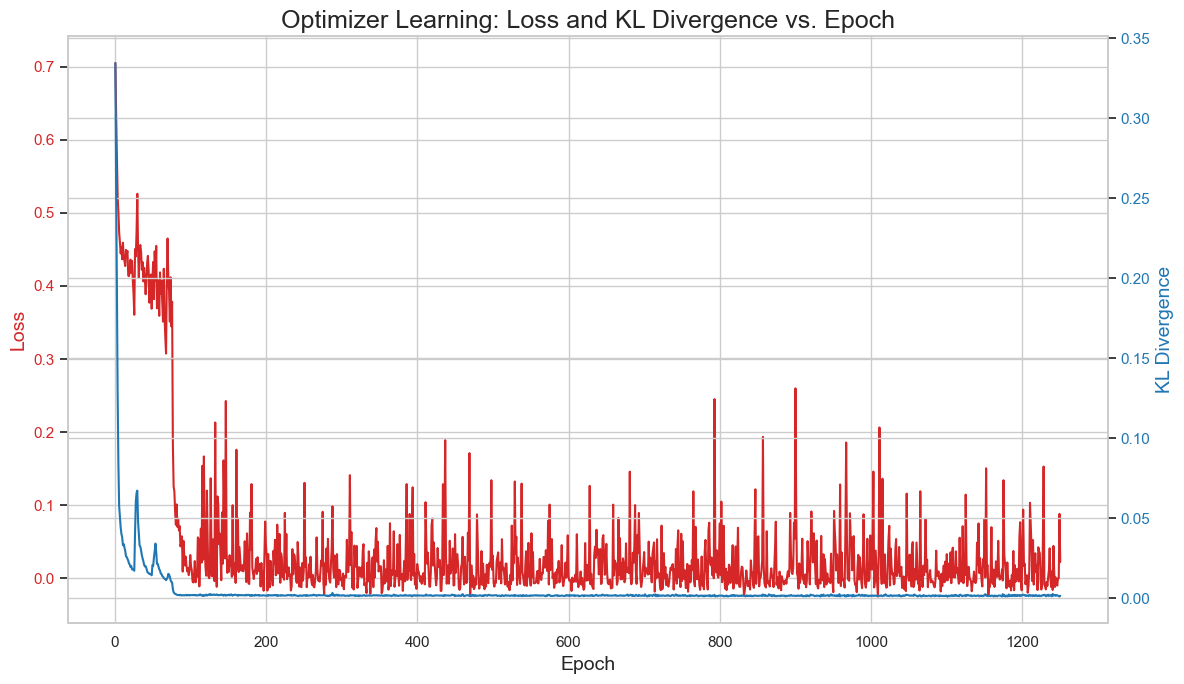

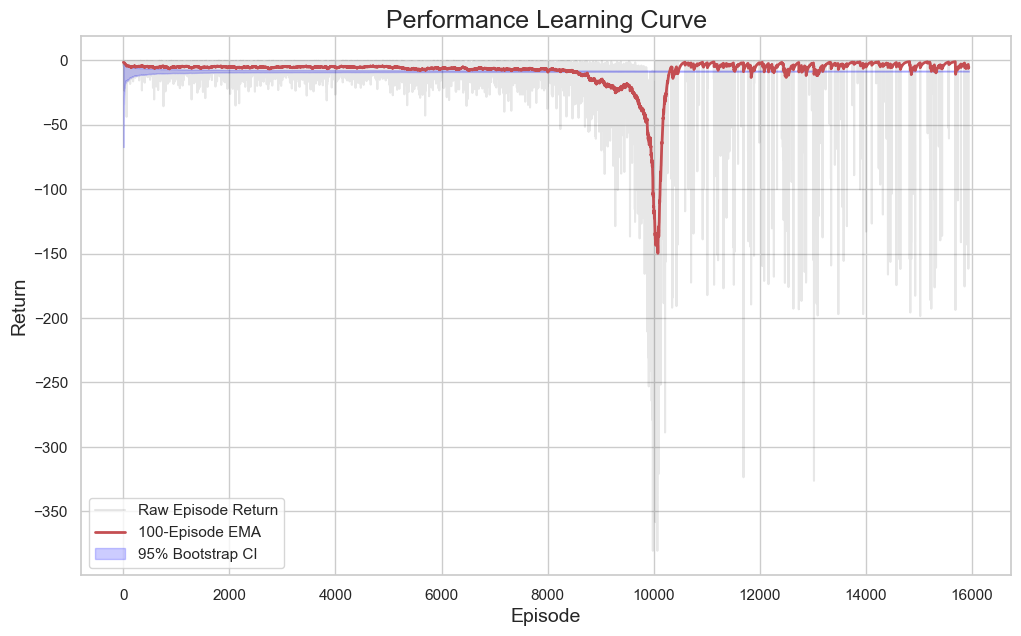

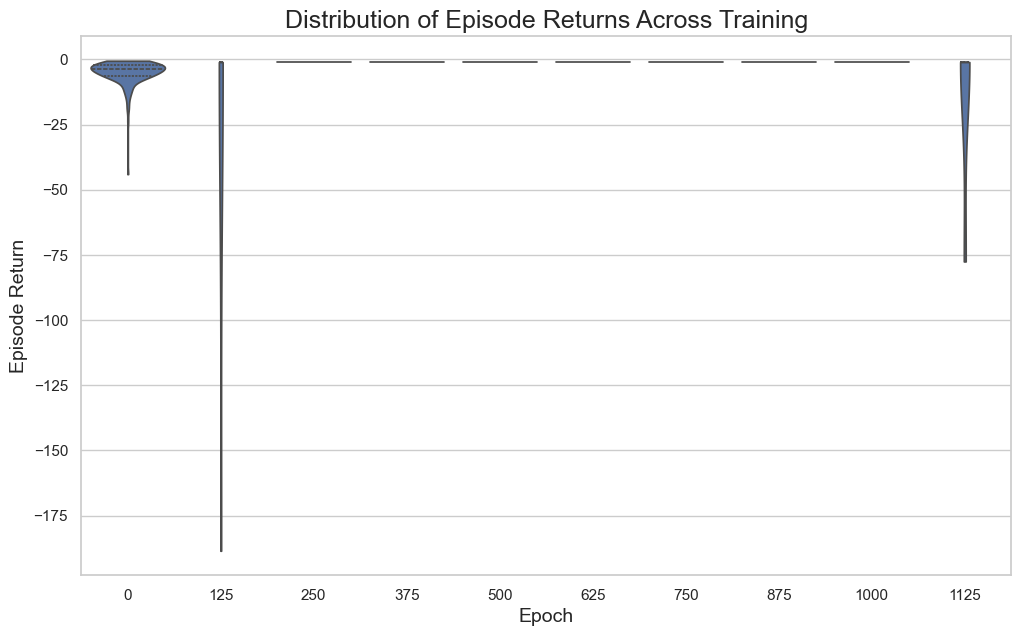

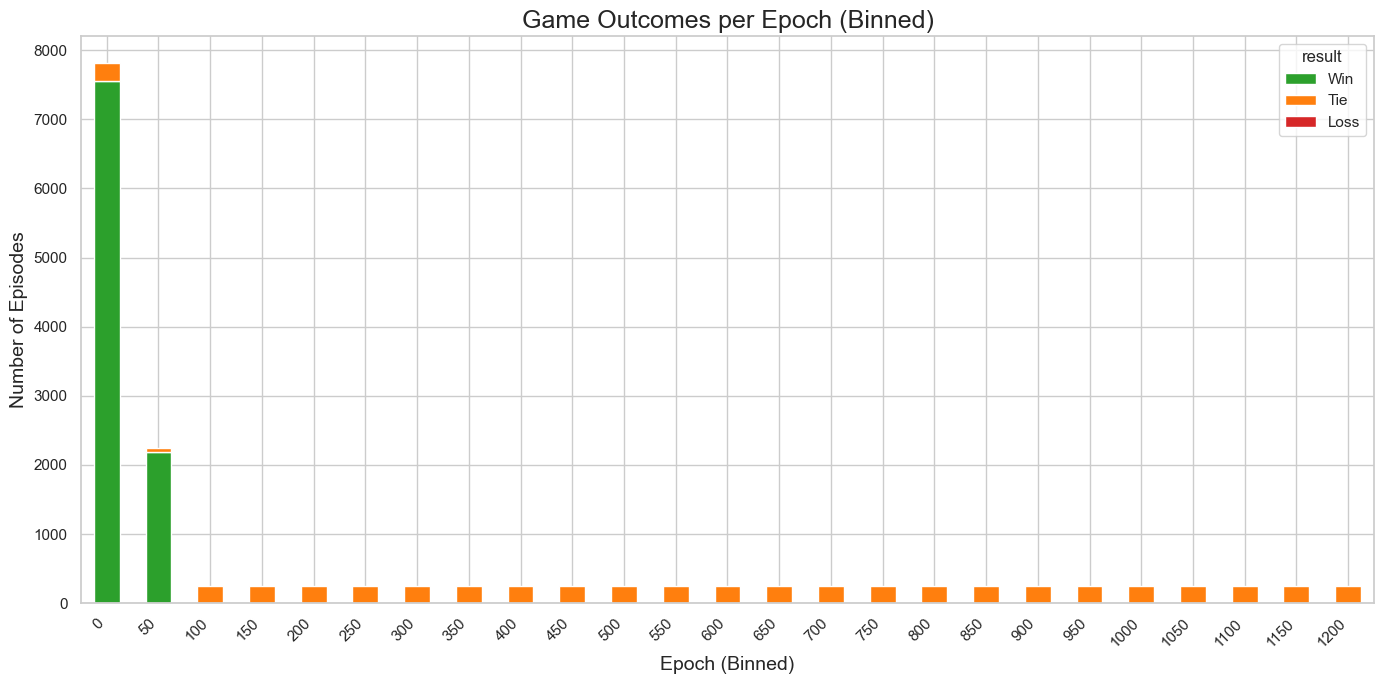

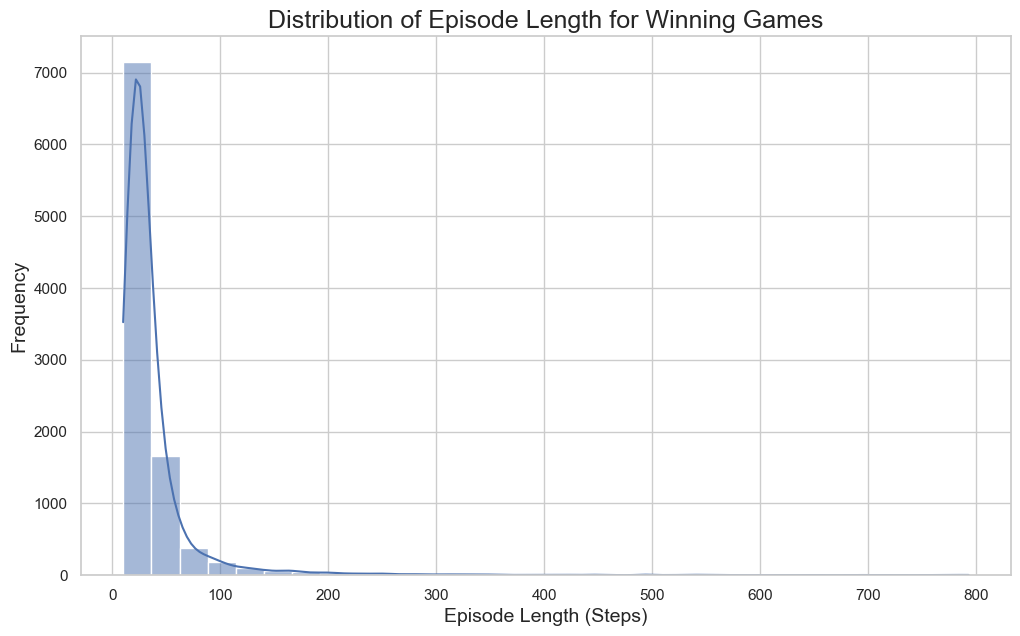


--- Analysing: ppo_ensemble_pommerman_llm ---


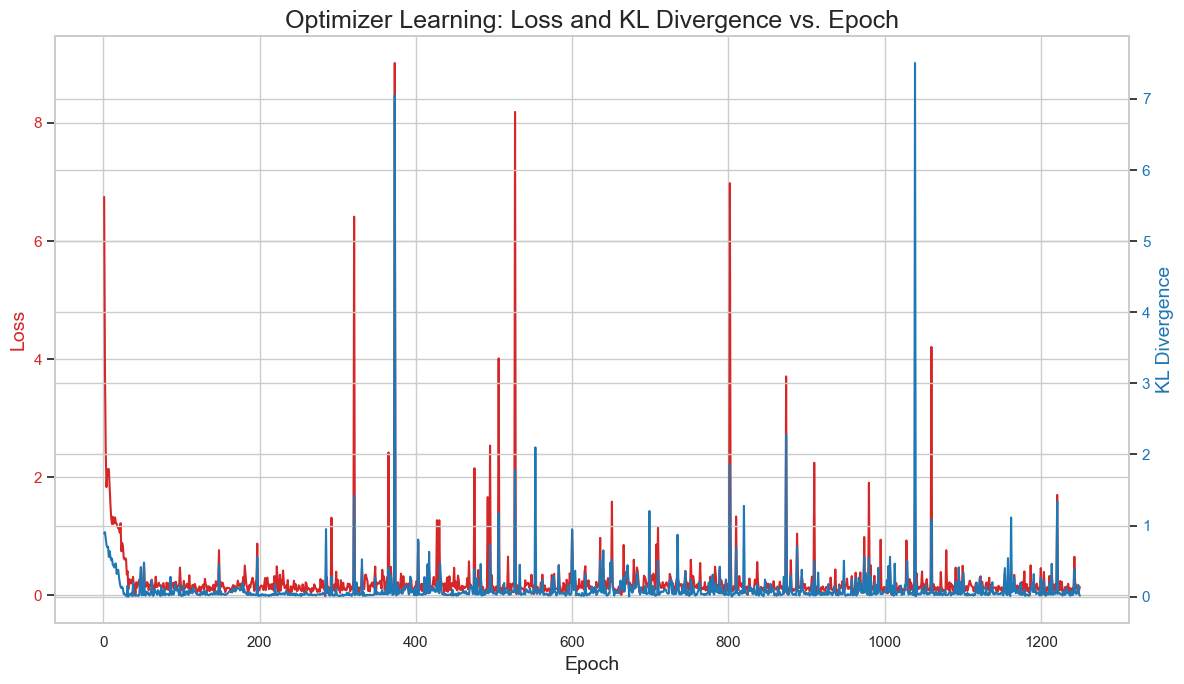

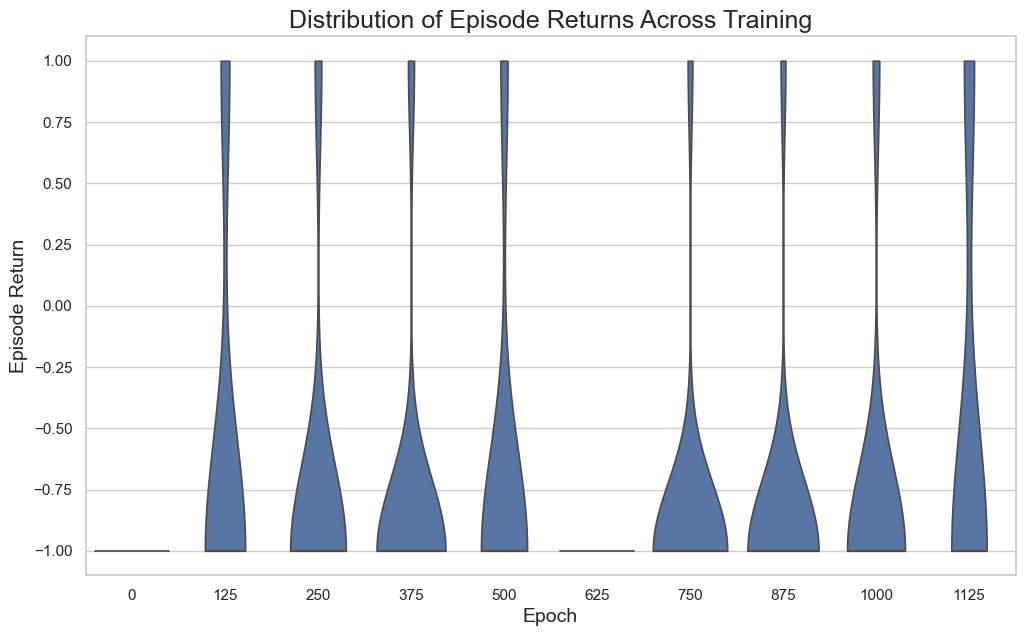

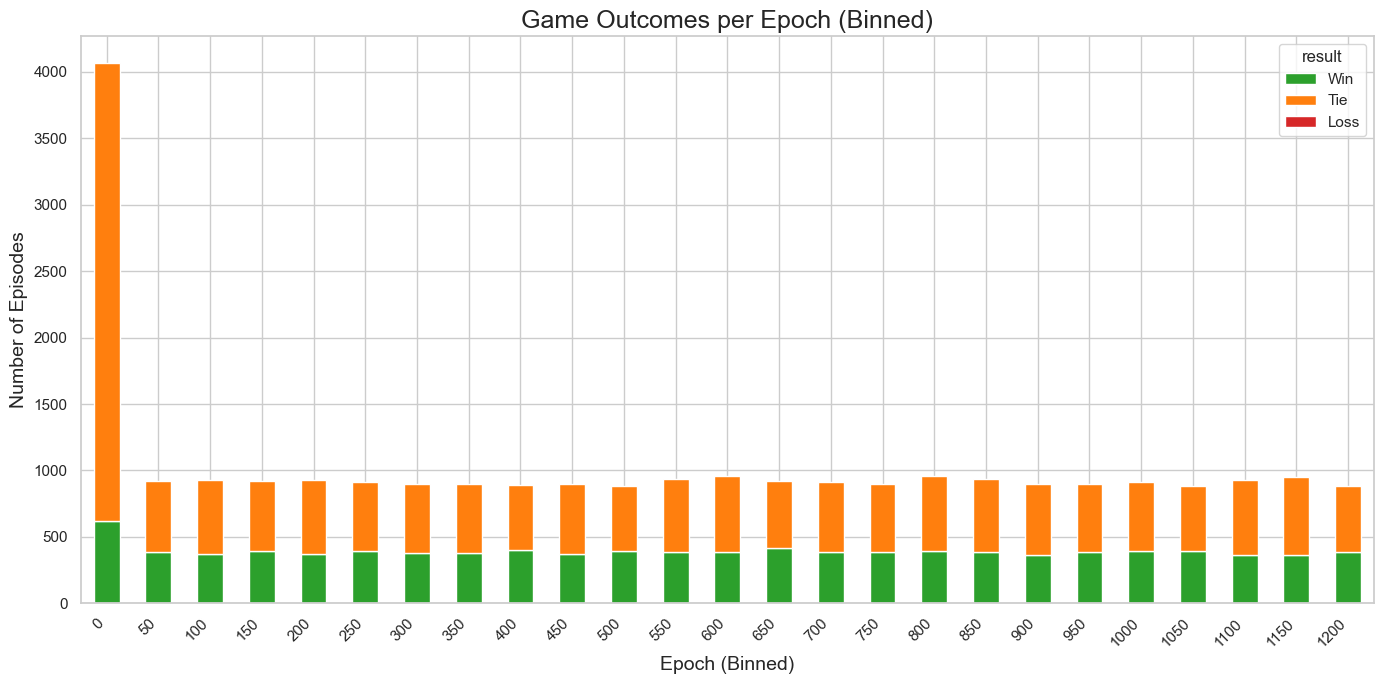



  GENERATING COMPARATIVE VISUALISATIONS  


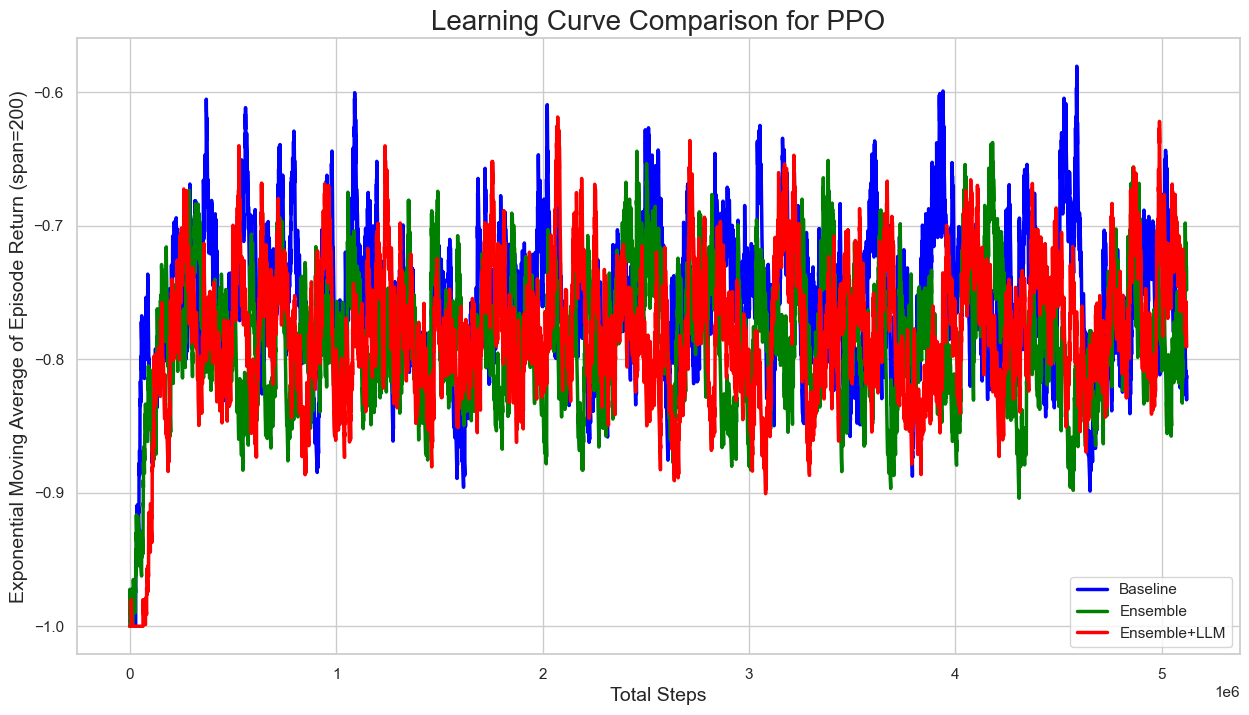

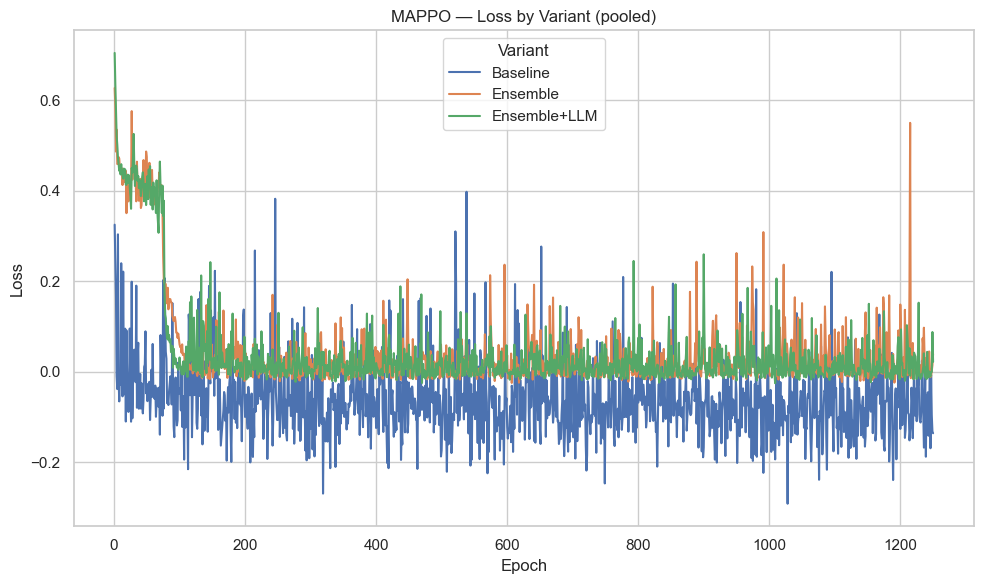

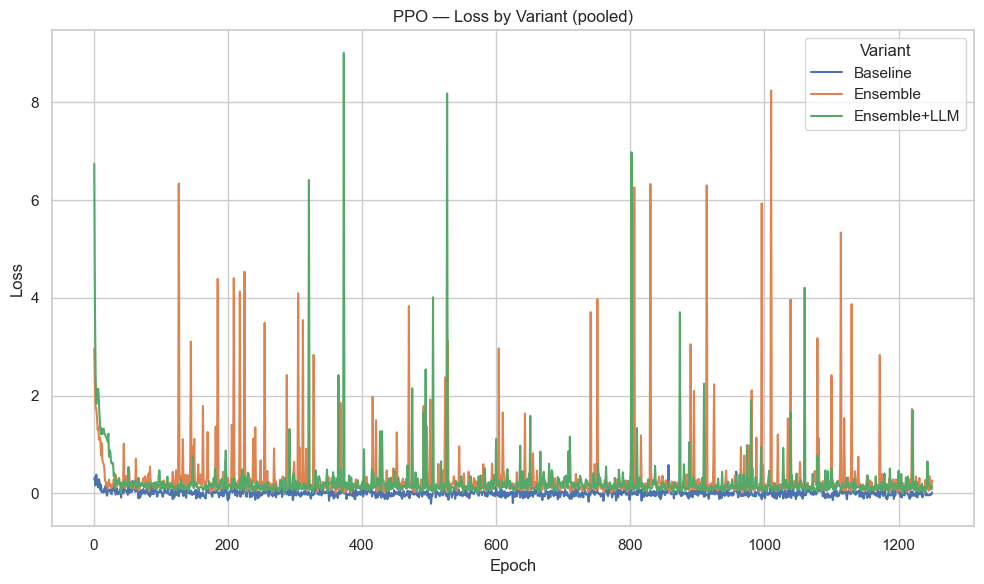

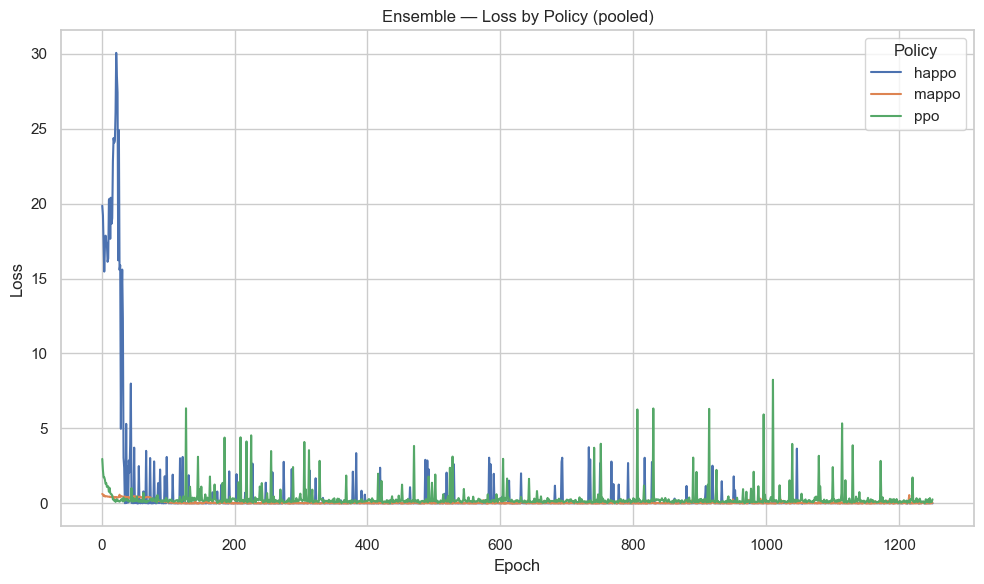

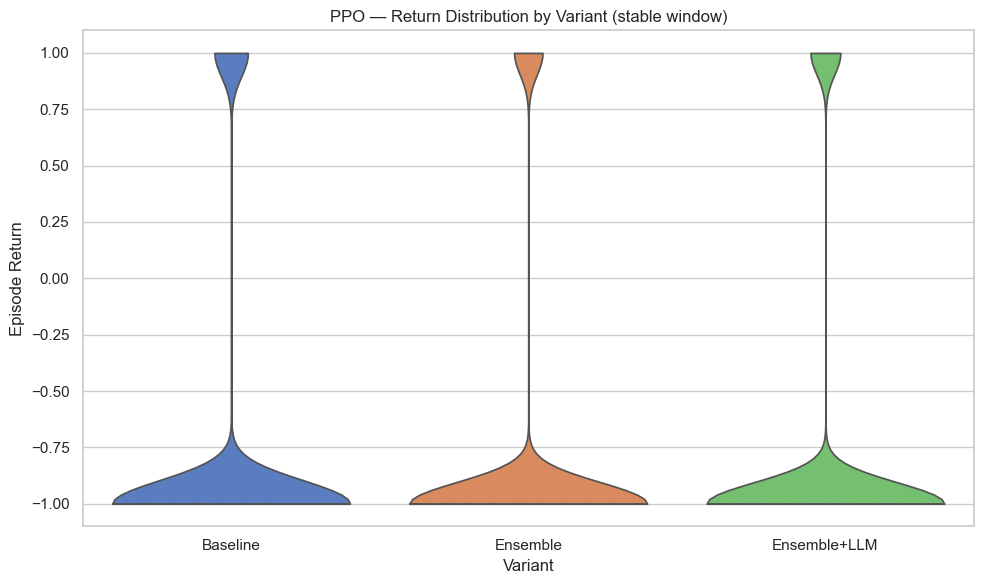

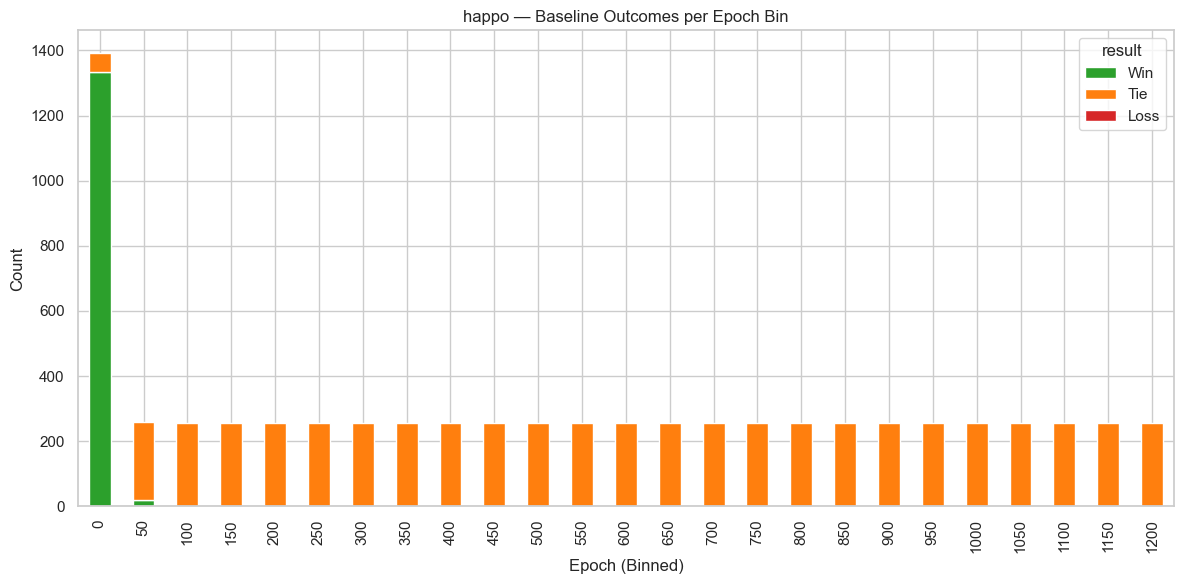

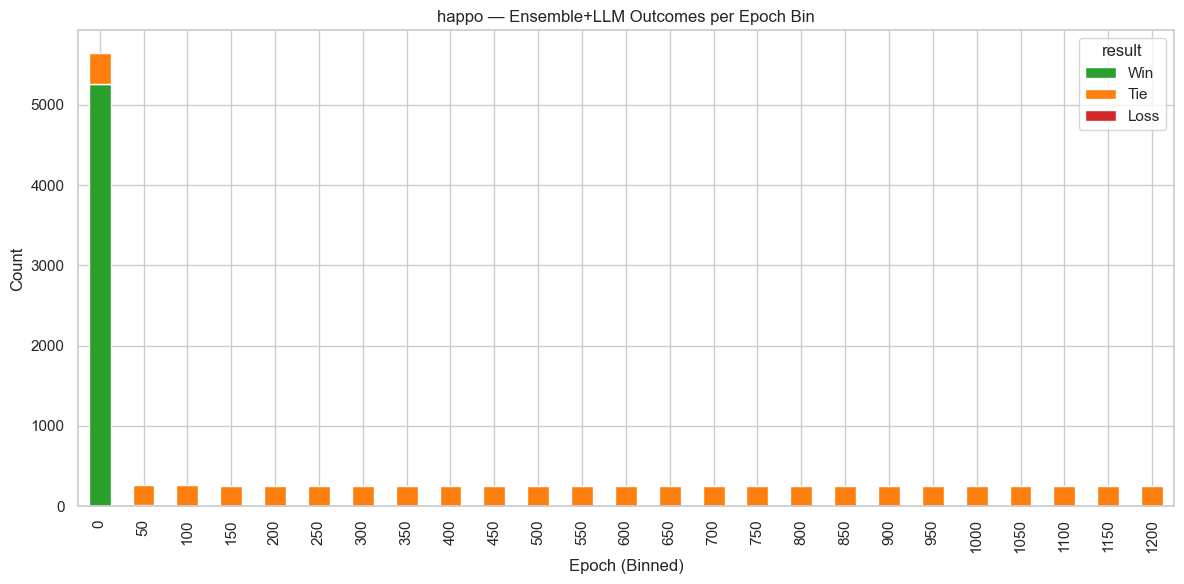

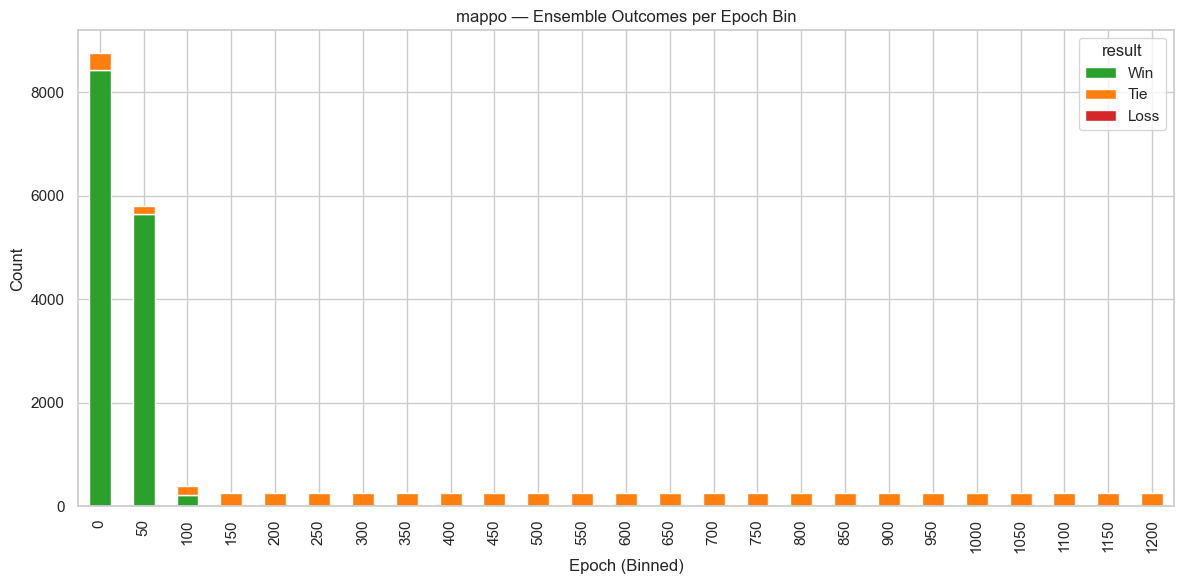

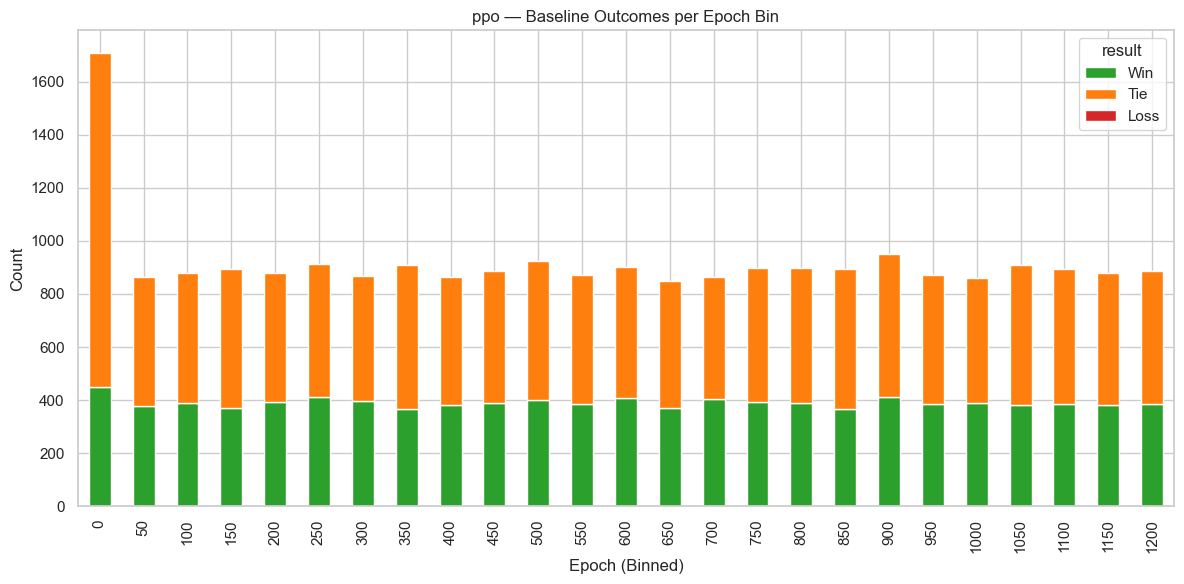

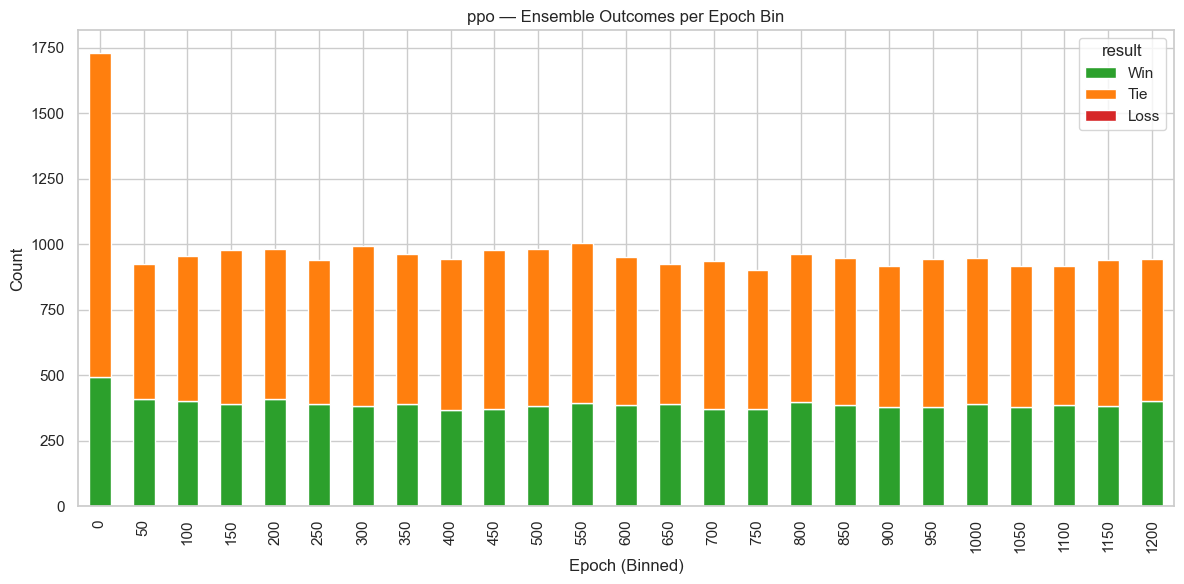

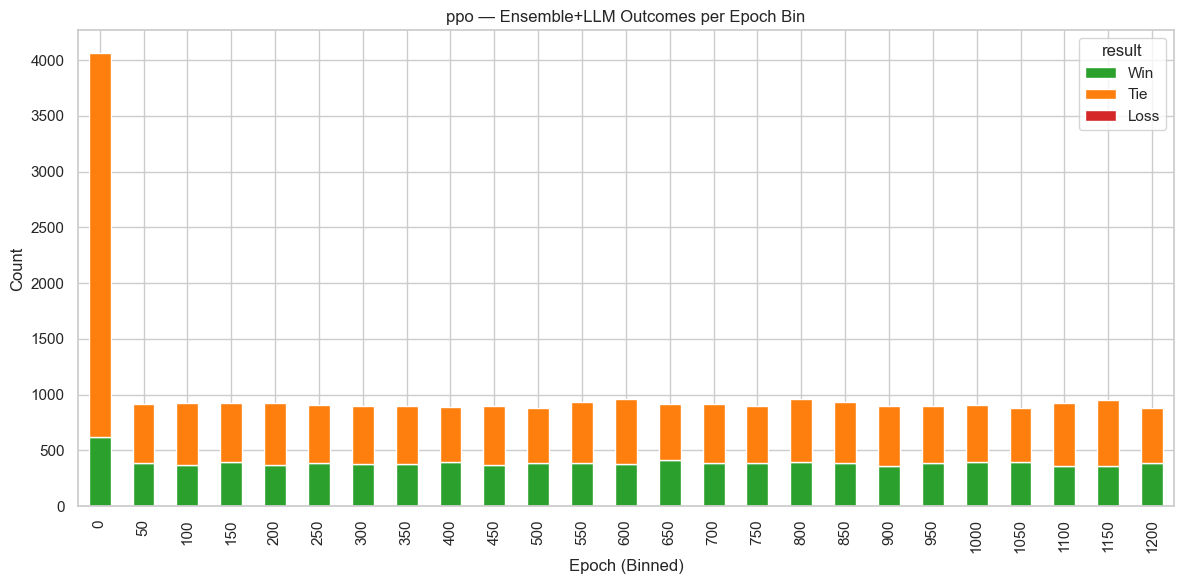

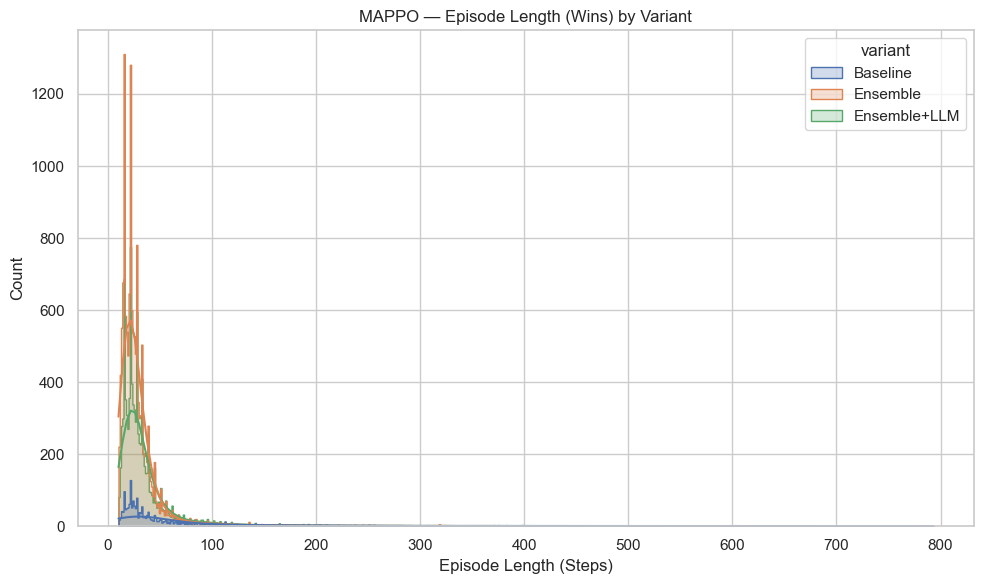

In [2]:
BASE_LOG_DIR = r'C:\Users\princ\source\repos\school\Research-Project\pommerman_research\logs\verified'

EXPERIMENT_DIRS = [
    'happo_pommerman',
    'mappo_pommerman',
    'ppo_pommerman',
    'happo_ensemble_pommerman',
    'mappo_ensemble_pommerman',
    'ppo_ensemble_pommerman',
    'happo_ensemble_pommerman_llm',
    'mappo_ensemble_pommerman_llm',
    'ppo_ensemble_pommerman_llm',
    # 'happo_ensemble_uncertainity_pommerman',
    # 'ppo_ensemble_pommerman_bad'
]

RESULTS_DIR = 'analysis_results'
if not os.path.exists(RESULTS_DIR):
    os.makedirs(RESULTS_DIR)
    

all_data = {}
for exp_name in EXPERIMENT_DIRS:
    data = evaluate.load_experiment_data(BASE_LOG_DIR, exp_name)
    if data:
        all_data[exp_name] = data


print("\n\n" + "="*50)
print("  PERFORMING SINGLE-EXPERIMENT ANALYSIS  ")
print("="*50)
for exp_name, data in all_data.items():
    print(f"\n--- Analysing: {exp_name} ---")
    exp_results_dir = os.path.join(RESULTS_DIR, exp_name)
    if not os.path.exists(exp_results_dir):
        os.makedirs(exp_results_dir)

    evaluate.plot_optimizer_learning(data['epoch_summary'], save_path=os.path.join(exp_results_dir, 'optimizer_learning.png'))
    evaluate.plot_learning_curve(data['training_episodes'], save_path=os.path.join(exp_results_dir, 'learning_curve.png'))
    evaluate.plot_outcome_variability(data['training_episodes'], save_path=os.path.join(exp_results_dir, 'outcome_variability.png'))
    evaluate.plot_win_tie_loss(data['training_episodes'], save_path=os.path.join(exp_results_dir, 'win_tie_loss.png'))
    evaluate.plot_win_speed(data['training_episodes'], save_path=os.path.join(exp_results_dir, 'win_speed.png'))


print("\n\n" + "="*50)
print("  GENERATING COMPARATIVE VISUALISATIONS  ")
print("="*50)
for policy in ['happo', 'mappo', 'ppo']:
    evaluate.plot_combined_learning_curves(policy, all_data, save_path=os.path.join(RESULTS_DIR, f'{policy}_combined_curves.png'))


evaluate.plot_grouped_epoch_loss(all_data, results_dir=RESULTS_DIR)
evaluate.plot_grouped_outcome_variability(all_data, results_dir=RESULTS_DIR)
evaluate.plot_grouped_win_tie_loss(all_data, results_dir=RESULTS_DIR)
evaluate.plot_grouped_win_speed(all_data, results_dir=RESULTS_DIR)


We want to try and see if GAM will make a difference in the performance of our agents.

loss → 11250 rows
kl_divergence → 11250 rows
total_steps → 11250 rows
win_rate → 10 rows
avg_return → 10 rows
policy_entropy → 11250 rows
action_prob_gap → 11250 rows
ep_return → 11250 rows
[GAM] Fitting loss ...


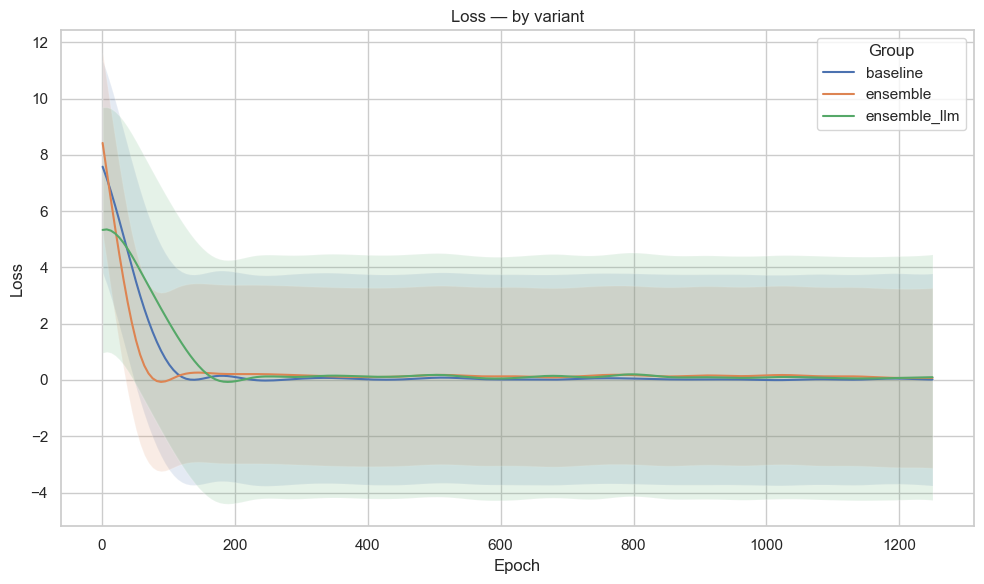

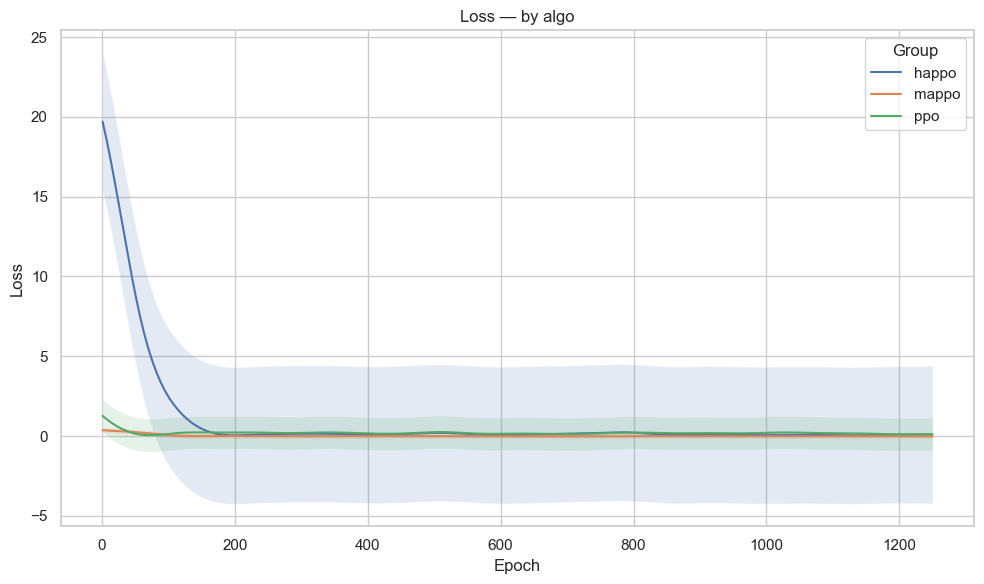

[GAM] Fitting kl_divergence ...


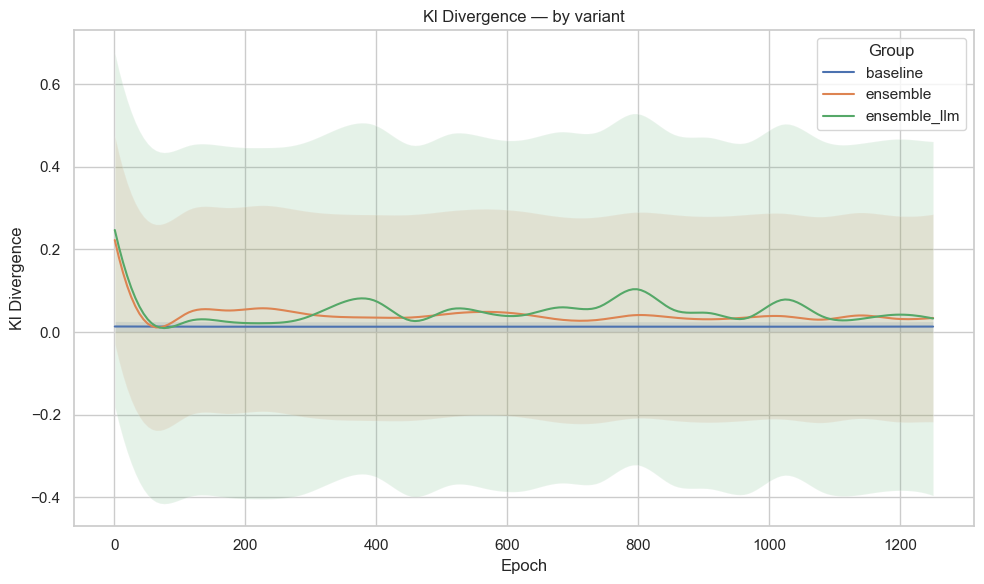

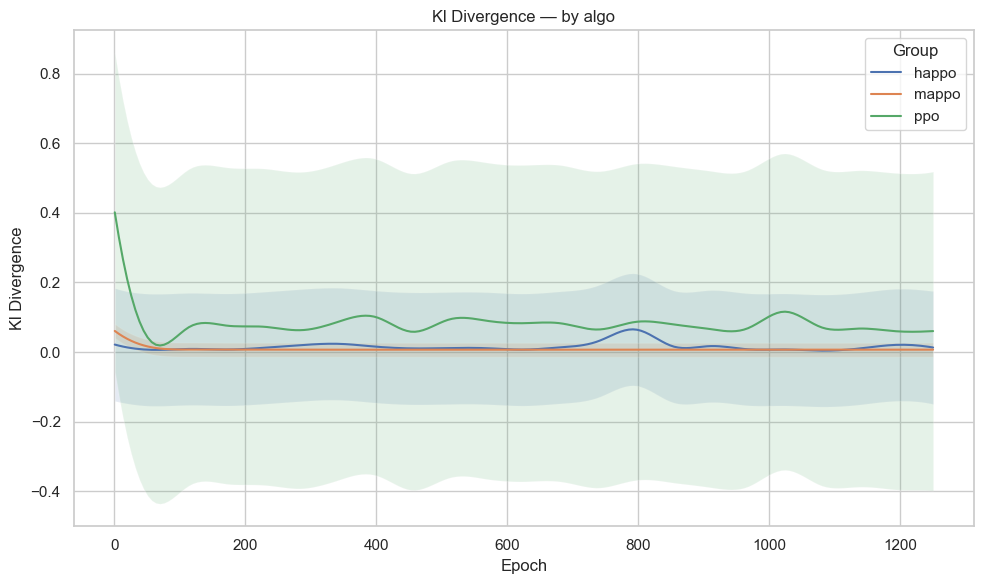

[GAM] Fitting total_steps ...


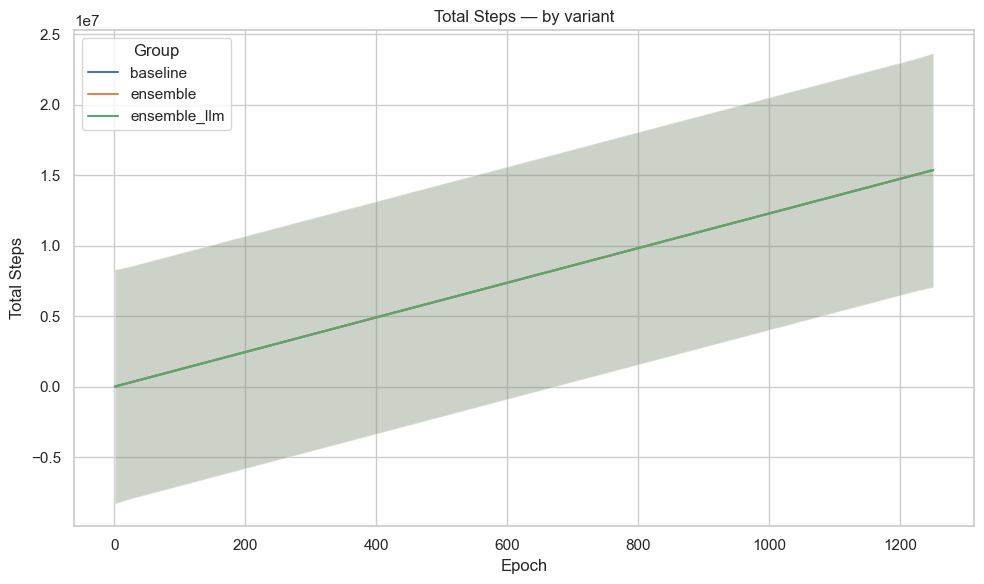

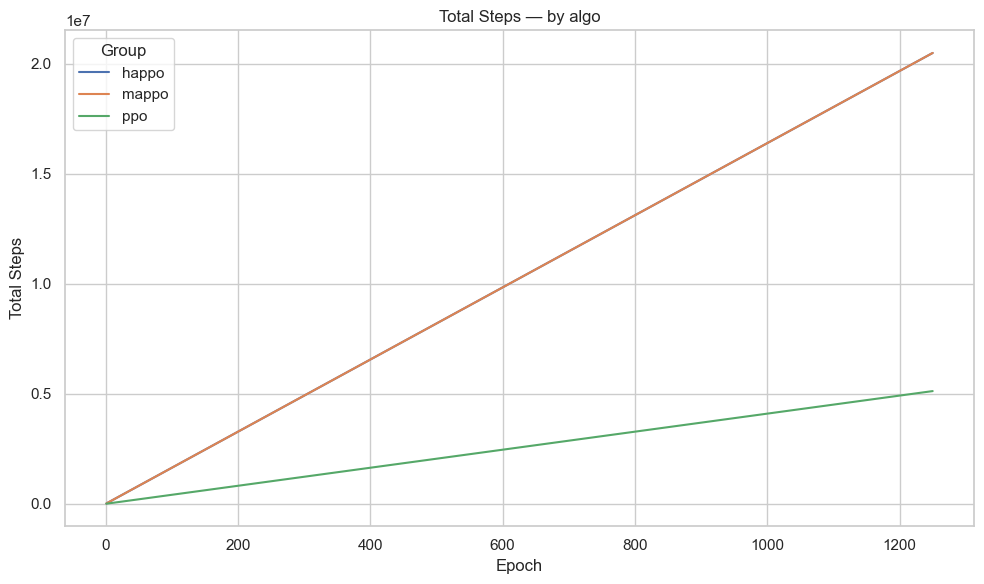

[GAM] Fitting win_rate ...
[GAM] Fitting avg_return ...
[GAM] Fitting policy_entropy ...


[GAM] Fitting action_prob_gap ...


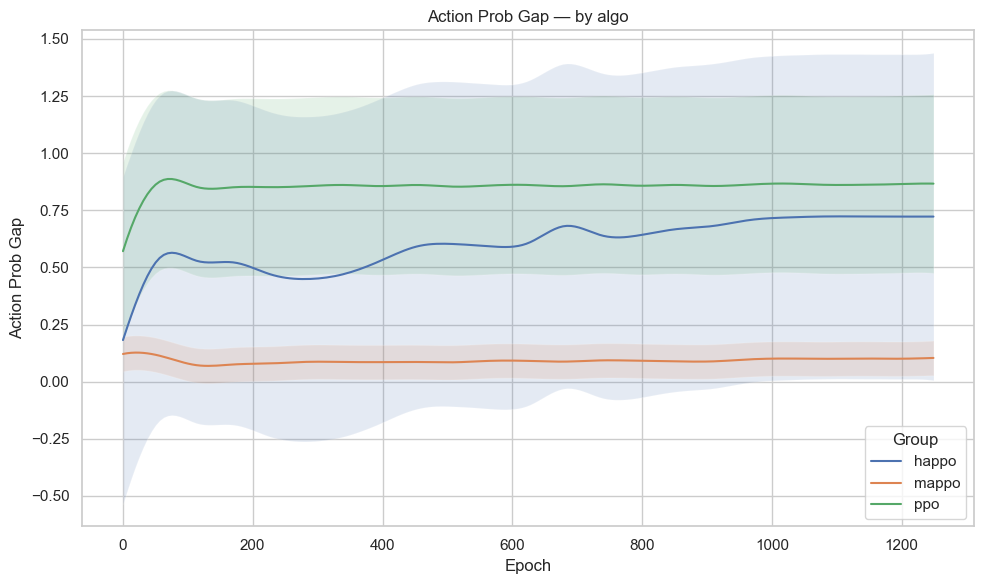

[GAM] Fitting ep_return ...


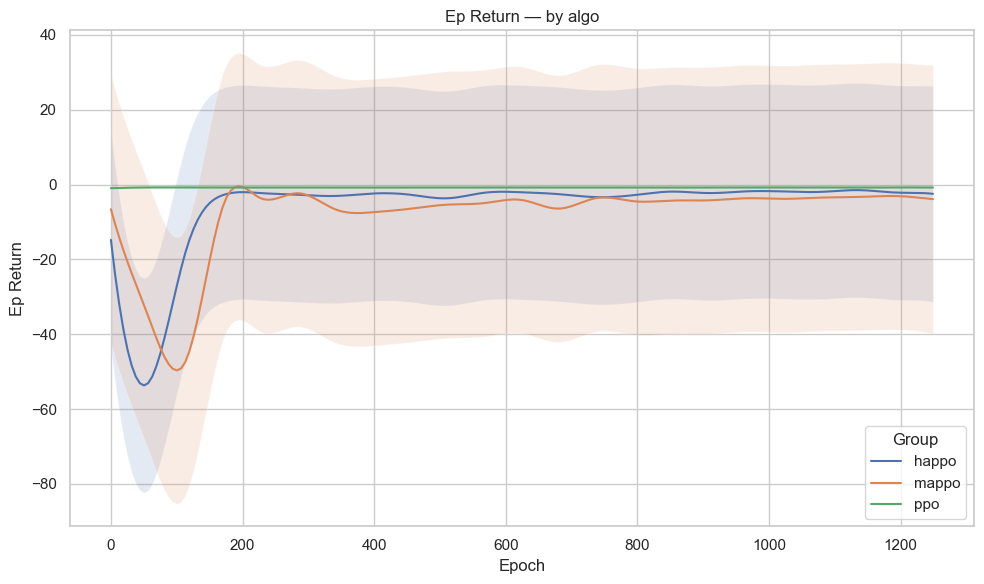

[GAM] Done. Outputs in: analysis_results_gam


In [3]:
from eval_new import (build_all_longdfs, run_full_gam_suite)

longdfs = build_all_longdfs(all_data, metric_names=[
    'loss', 'kl_divergence', 'total_steps',
    'win_rate', 'avg_return',
    'policy_entropy', 'action_prob_gap', 'ep_return'
])

for k, v in longdfs.items():
    print(k, "→", len(v), "rows")

gam_summaries = run_full_gam_suite(
    longdfs,
    outdir="analysis_results_gam",
    time_col="epoch",
    lam=0.6,
    n_splines=25
)

GAM Alternatives:  Pairwise Contrasts + Block Bootstrap (Time Series)

In [4]:
import pandas as pd
from eval_new import (
    parse_experiment_columns, build_and_plot_all, pairwise_contrasts, plot_contrasts_ci,
    build_metric_long_df, plot_metric_by_group, run_bootstrap_contrasts_for_metric,run_full_metric_suite
)


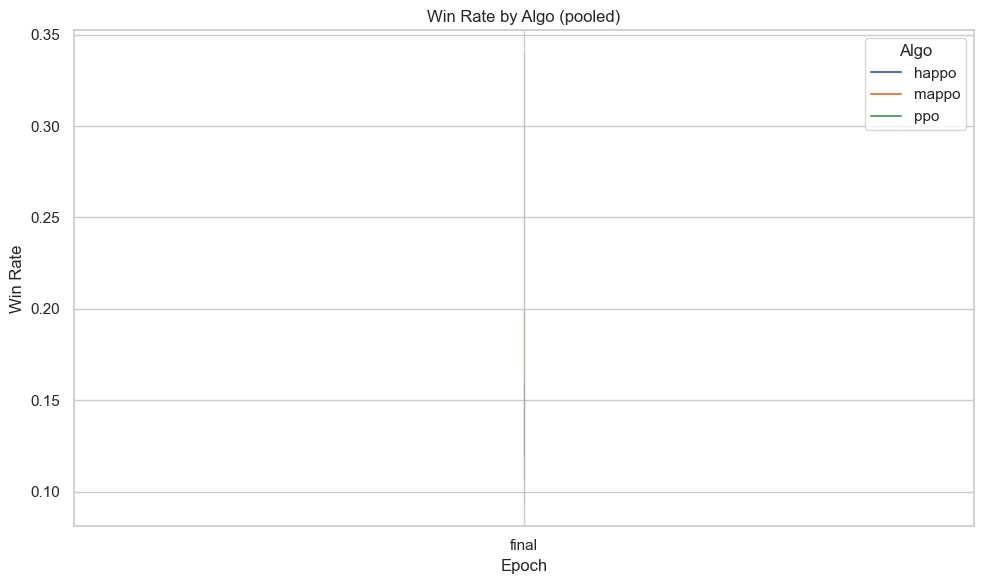

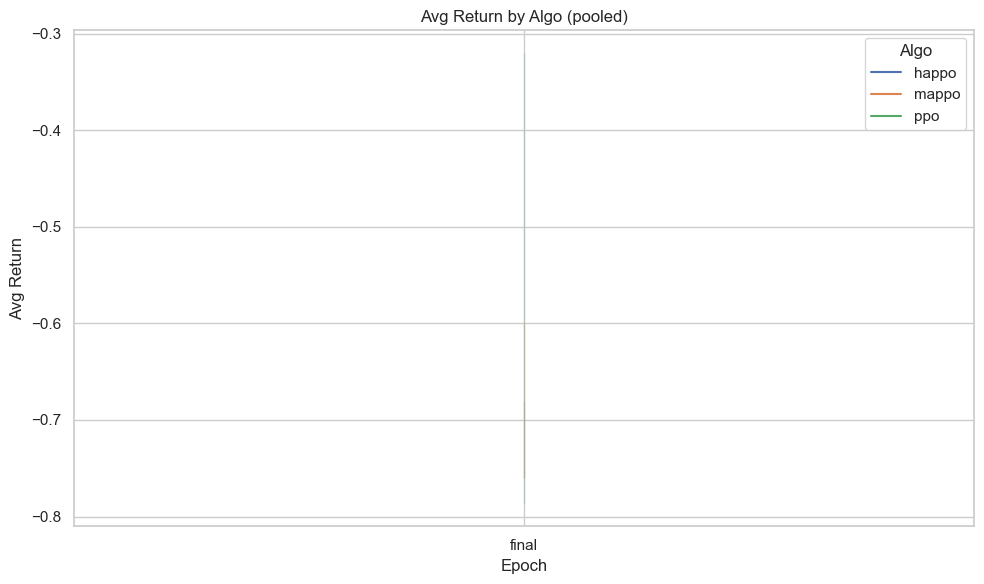

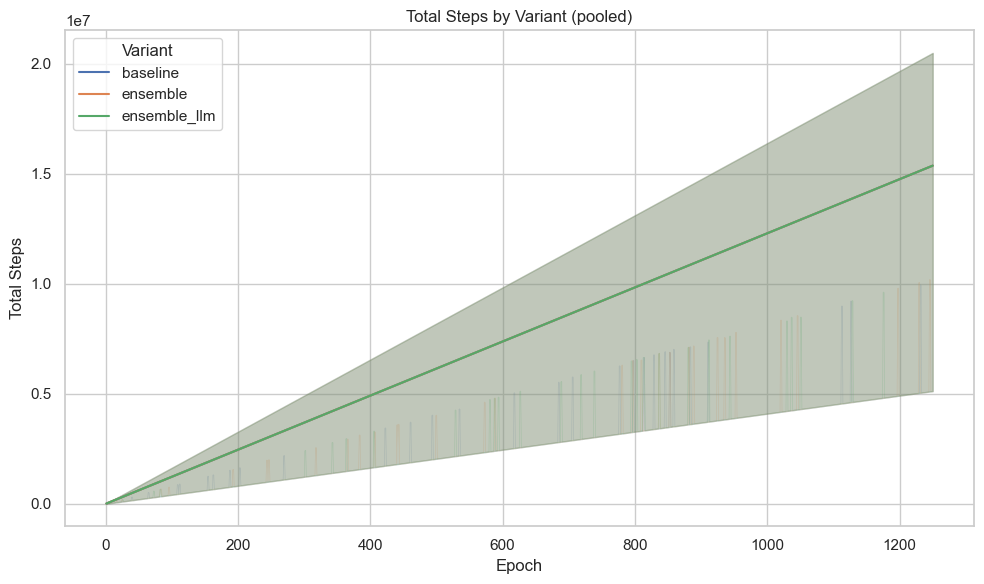

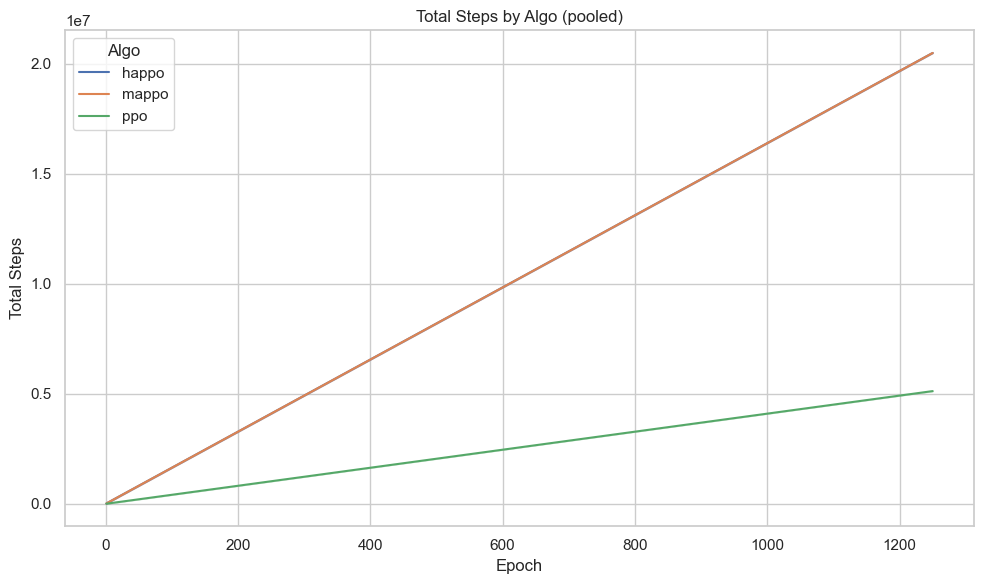

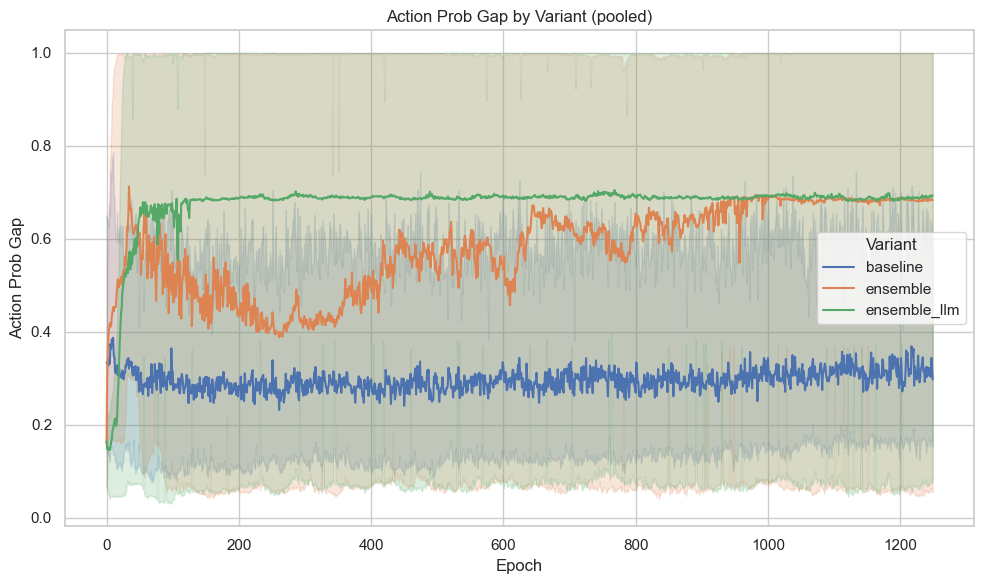

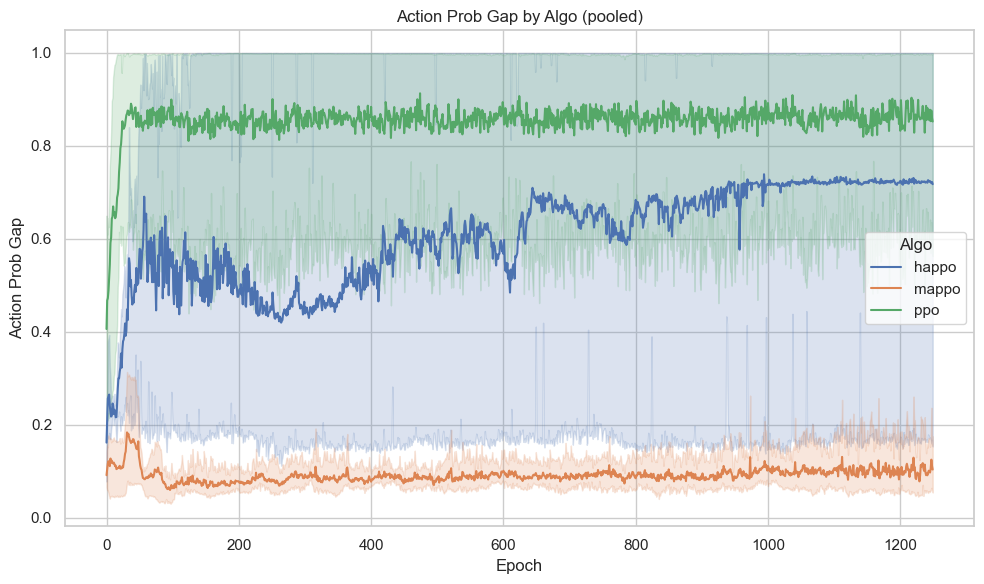

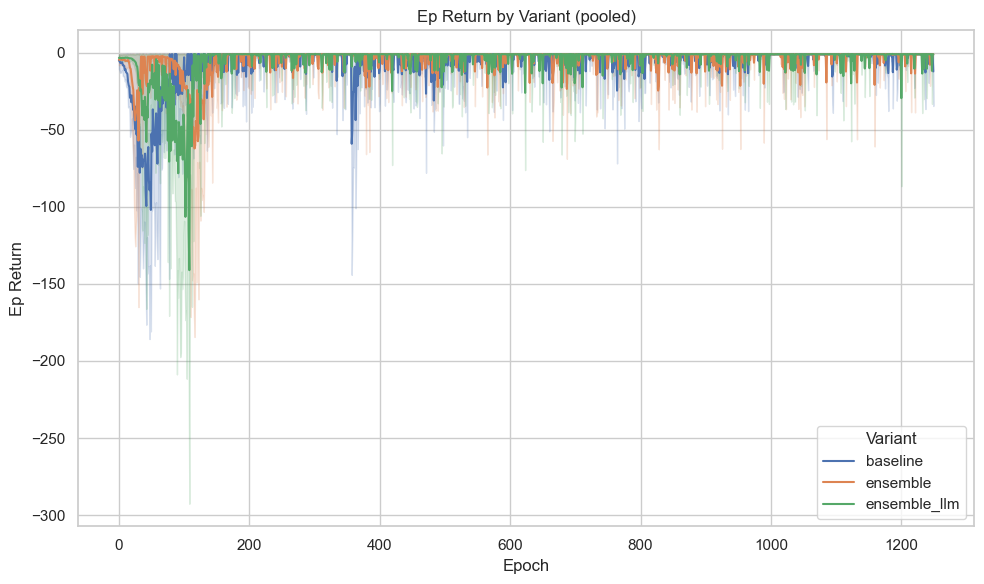

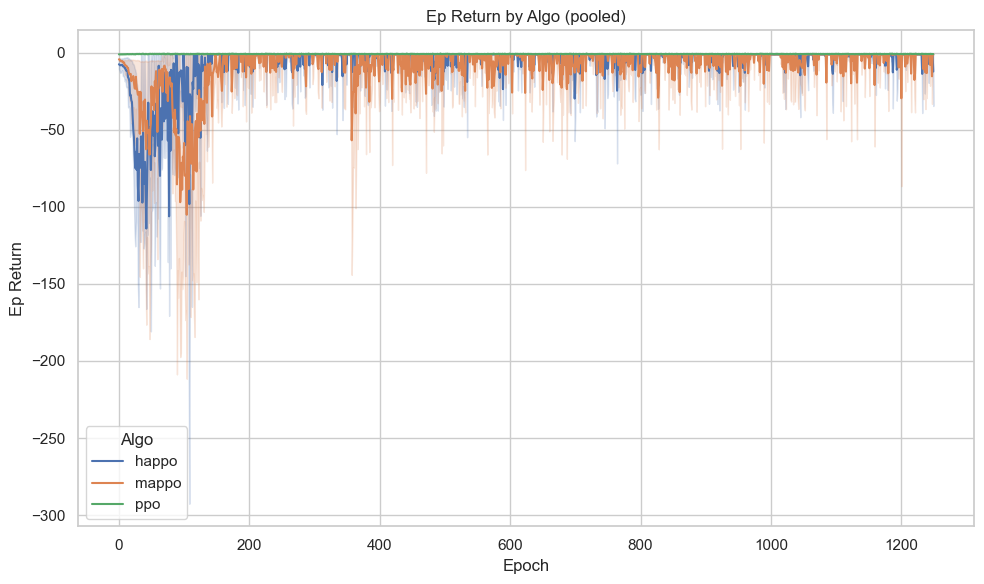

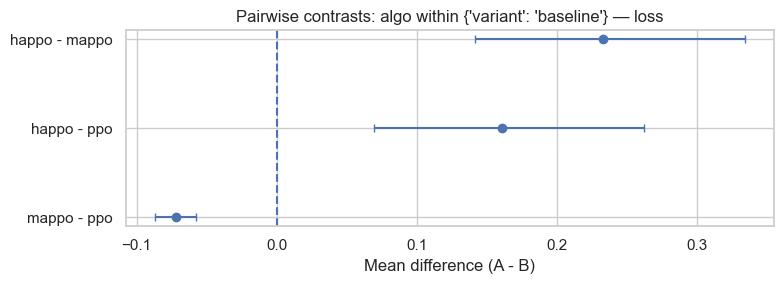

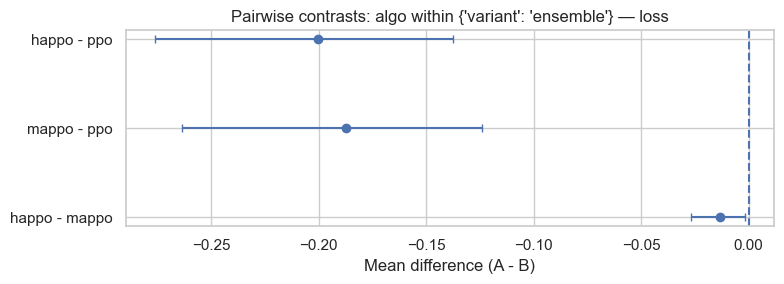

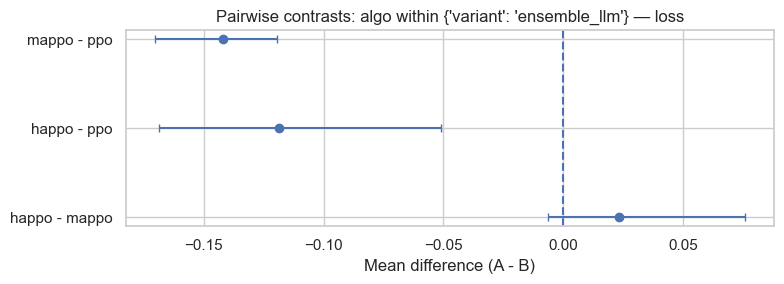

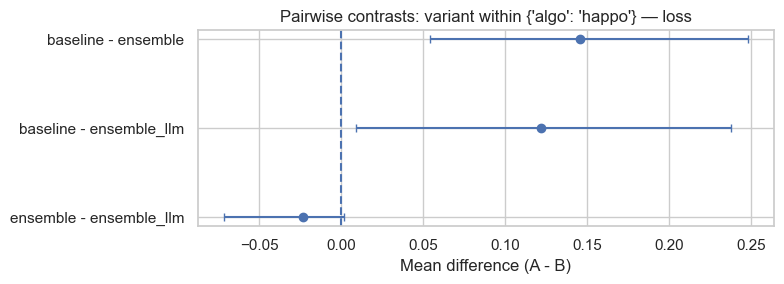

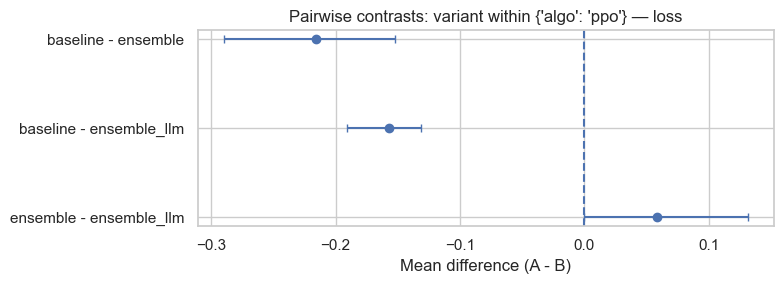

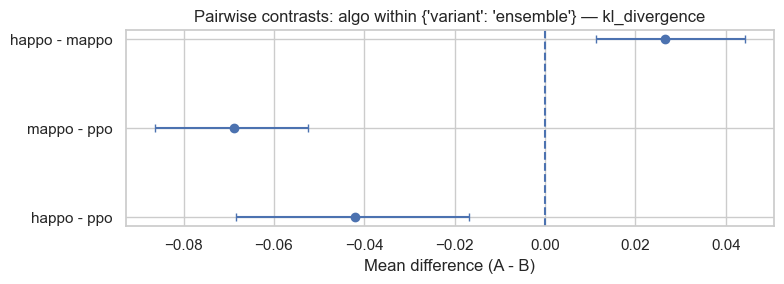

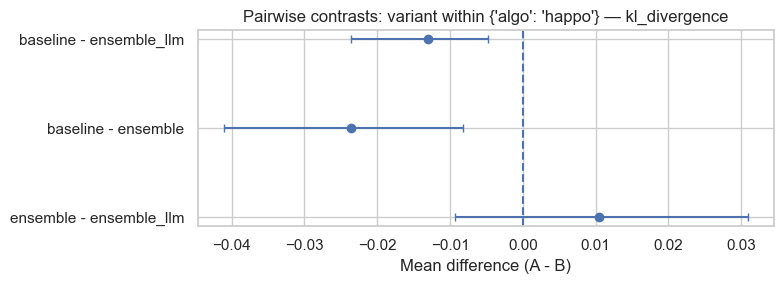

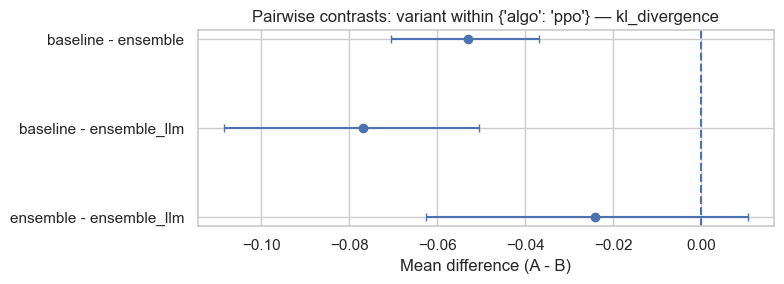

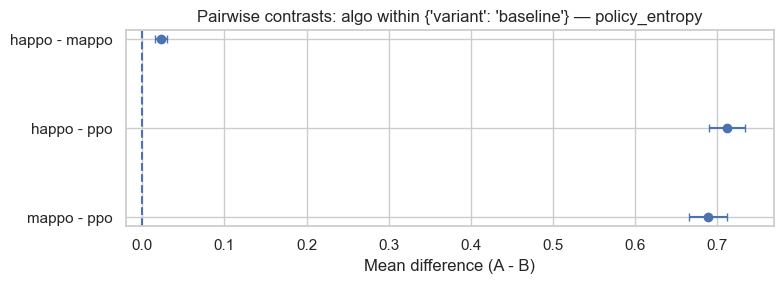

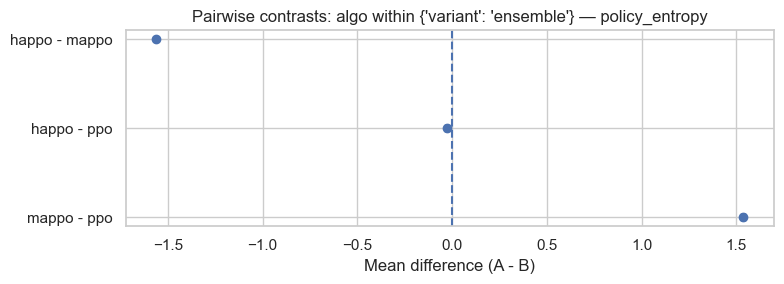

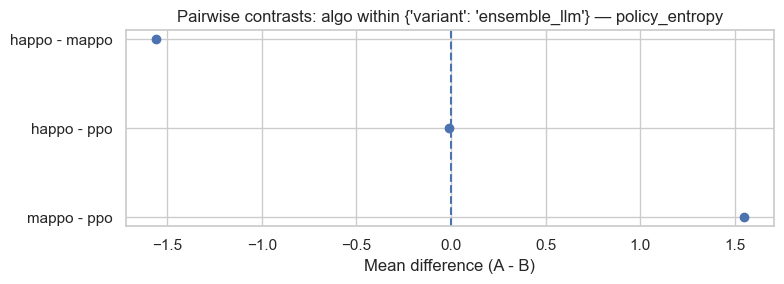

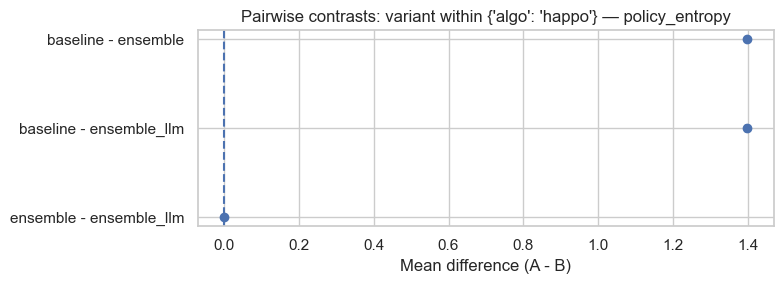

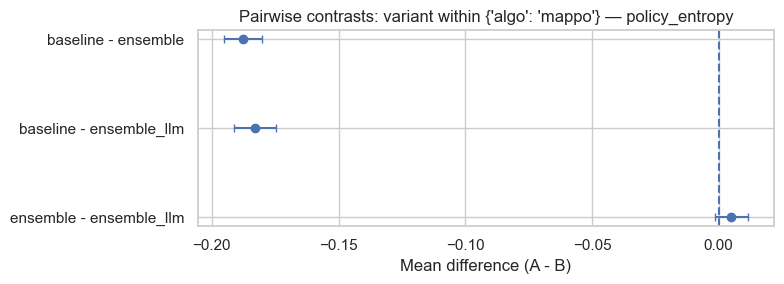

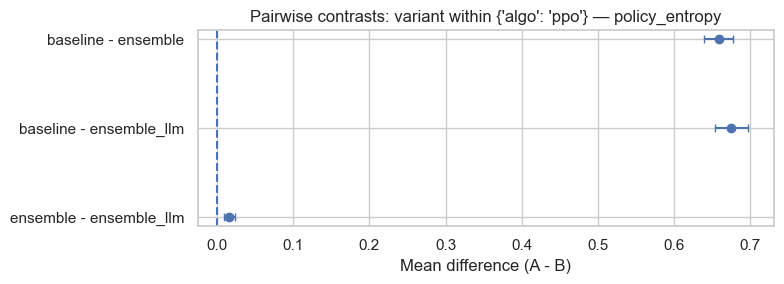

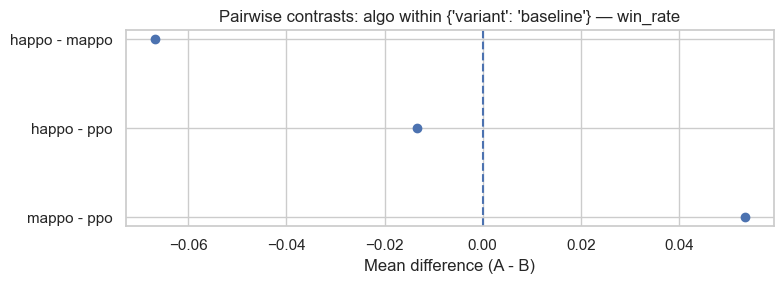

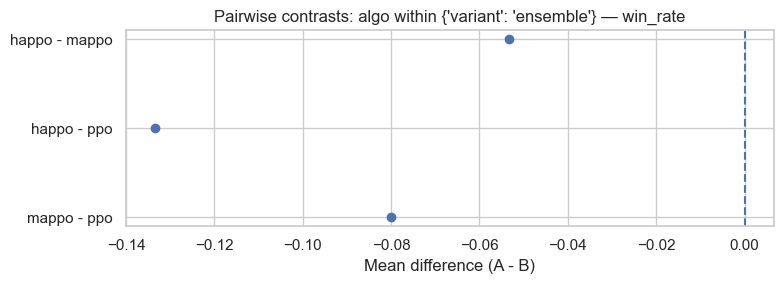

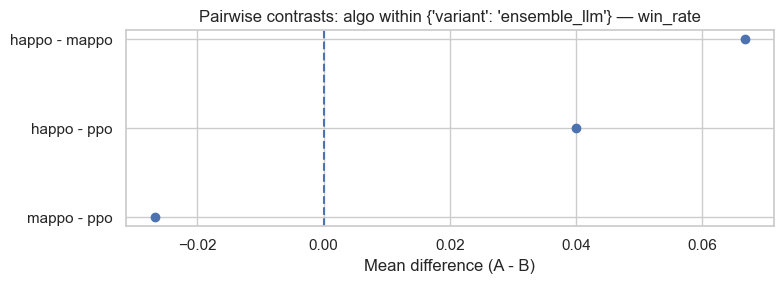

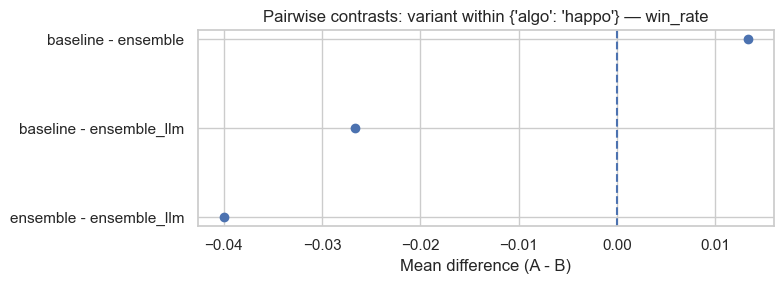

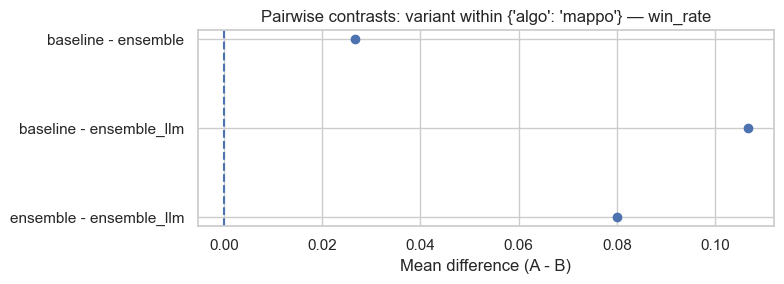

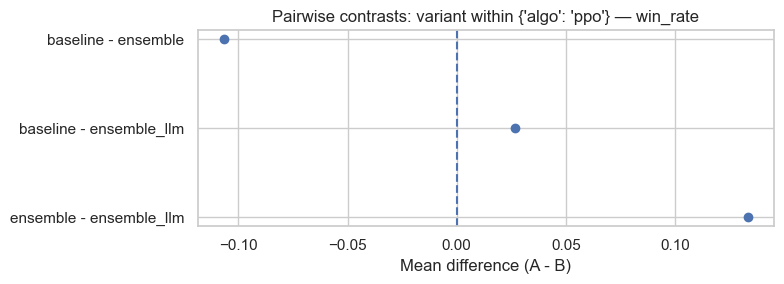

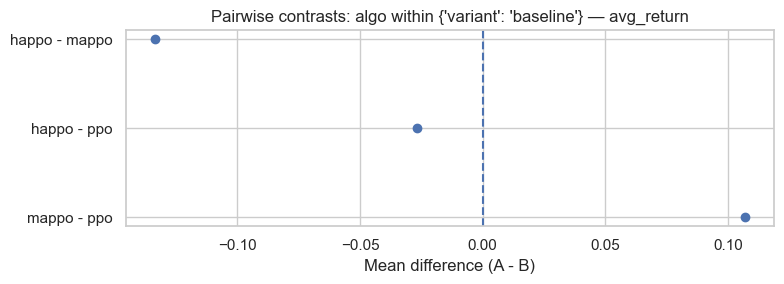

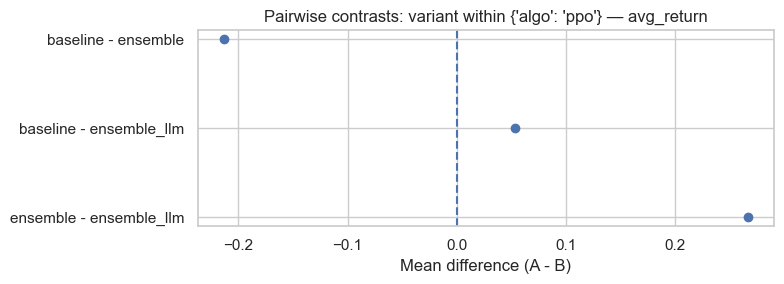

Done. Outputs in: analysis_results


In [5]:
run_full_metric_suite(all_data, outdir="analysis_results", n_boot=5000)
